In [1]:
#Important Libraries
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Final_Sample (1).csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

Unnamed: 0                vin back_legroom        body_type  \
0            57071  1HGCV1F42LA123443      40.4 in            Sedan   
1            56716  1GNERFKW4LJ280771      38.4 in  SUV / Crossover   
2            50056  5J8TB1H51AA006383      37.6 in  SUV / Crossover   
3            50327  3GKALVEV0LL339320      39.7 in  SUV / Crossover   
4            94738  3C4PDDGG9KT794869      36.1 in  SUV / Crossover   
...            ...                ...          ...              ...   
199995       43655  3KPA24AD5LE341137      33.5 in            Sedan   
199996       72169  2T3H1RFV1KW001728      37.8 in  SUV / Crossover   
199997       17747  KL7CJKSB1LB333124      35.7 in  SUV / Crossover   
199998       44443  WAUFGAFC8EN111898      37.4 in            Sedan   
199999       83398  19XZE4F59ME003513      37.4 in            Sedan   

               city  city_fuel_economy  daysonmarket dealer_zip  \
0         Tipp City               30.0            15      45371   
1             Tampa               18.0            47      33619   
2          Oak Lawn               17.0             4      60453   
3        Marshfield               25.0             6      54449   
4            Newton               16.0            10       2458   
...             ...                ...           ...        ...   
199995  San Antonio               33.0             8      78238   
199996      Phoenix               26.0            11      85014   
199997        Ozark               26.0            41      65721   
199998        Fargo               18.0             9      58103   
199999       Maumee                NaN            11      43537   

       engine_cylinders  engine_displacement  ...                 torque  \
0                    I4               1500.0  ...  192 lb-ft @ 1,500 RPM   
1                    V6               3600.0  ...  266 lb-ft @ 2,800 RPM   
2                    I4               2300.0  ...  260 lb-ft @ 4,500 RPM   
3                    I4               2000.0  ...  260 lb-ft @ 2,000 RPM   
4                    V6               3600.0  ...  260 lb-ft @ 4,400 RPM   
...                 ...                  ...  ...                    ...   
199995               I4               1600.0  ...  112 lb-ft @ 4,500 RPM   
199996               I4               2500.0  ...  184 lb-ft @ 5,000 RPM   
199997               I4               1400.0  ...    148 lb-ft @ 200 RPM   
199998               V6               3000.0  ...  325 lb-ft @ 2,900 RPM   
199999        I4 Hybrid               1500.0  ...                    NaN   

       transmission                transmission_display  trimId  \
0               CVT  Continuously Variable Transmission  t88933   
1                 A                           Automatic  t85763   
2                 A                   5-Speed Automatic  t35818   
3                 A                   9-Speed Automatic  t85776   
4                 A                   6-Speed Automatic  t84351   
...             ...                                 ...     ...   
199995            A                           Automatic  t88913   
199996            A                   8-Speed Automatic  t84310   
199997            A                   6-Speed Automatic  t85771   
199998            A                   8-Speed Automatic  t51708   
199999            A                   1-Speed Automatic  t93078   

                                  trim_name wheel_system wheel_system_display  \
0                               1.5T EX FWD          FWD    Front-Wheel Drive   
1                                    LS FWD          FWD    Front-Wheel Drive   
2            SH-AWD with Technology Package          AWD      All-Wheel Drive   
3                                   SLT AWD          4WD     Four-Wheel Drive   
4                             Crossroad AWD          AWD      All-Wheel Drive   
...                                     ...          ...                  ...   
199995                                S FWD          FWD    Front

**Body Type Features:**

First, number of unique values and number of vehicles for different body types:

In [ ]:
print("Number of unique values = " , len(df["body_type"].unique()))
print("Number of cars for different body types: ")
df["body_type"].value_counts()

Number of unique values =  7
Number of cars for different body types: 


SUV / Crossover    114892
Sedan               60398
Hatchback            7122
Minivan              6449
Coupe                5676
Wagon                3351
Convertible          2112
Name: body_type, dtype: int64

Second, Number of missing values:

In [ ]:
print("Number of missing values = ", df["body_type"].isna().sum())

Number of missing values =  0


Plotting the means of prices for different Body Types


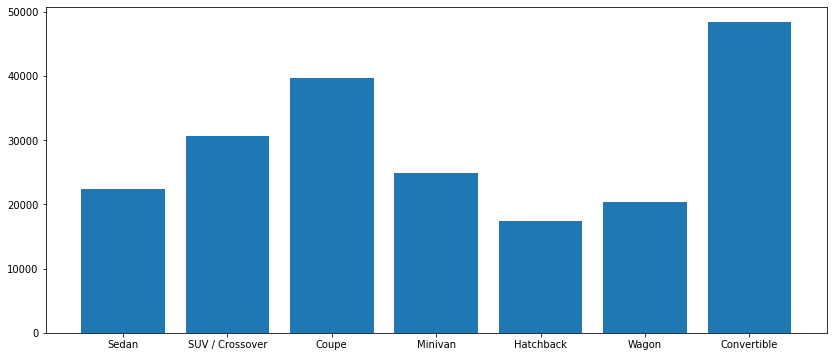

Plotting the maximum values of price for different Body Types


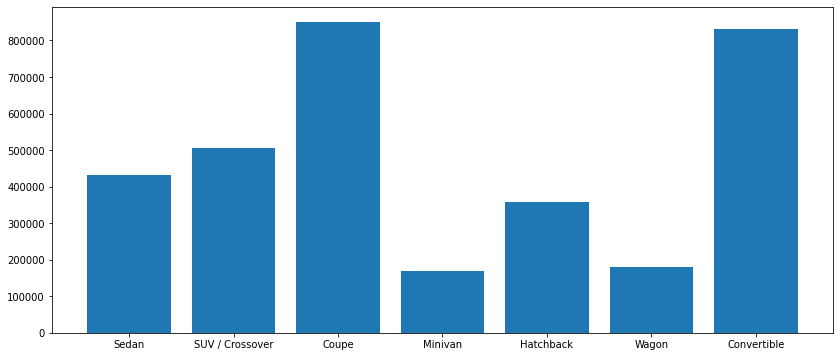

Plotting the minimum values of price for different Body Types


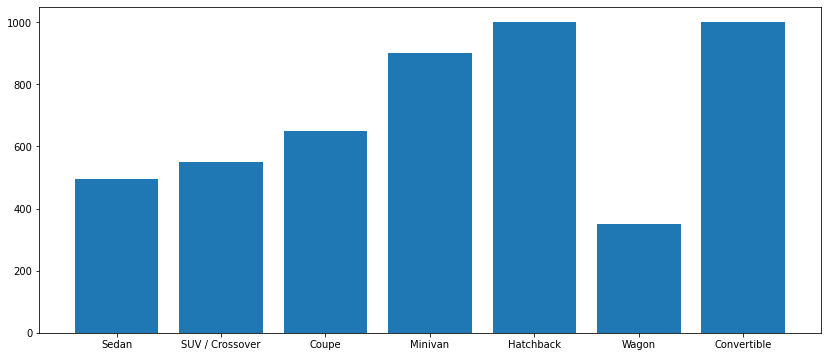

Plotting standard deviations values of price for different Body Types


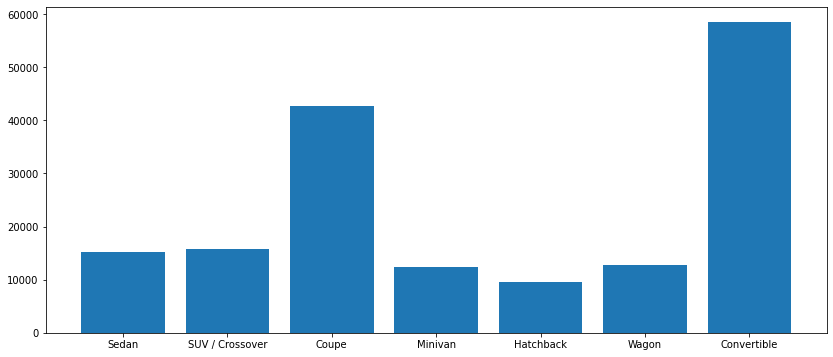

In [ ]:
import matplotlib.pyplot as plt
lis = df["body_type"].unique()
means = {}
maxs = {}
mins = {}
stds= {}
for item in lis:
  df1 = df[df.body_type == item]
  m = df1["price"].mean()
  means[item] = m
  m = df1["price"].max()
  maxs[item] = m
  m = df1["price"].min()
  mins[item] = m
  m = df1["price"].std()
  stds[item] = m

print("Plotting the means of prices for different Body Types")
names = list(means.keys())
values = list(means.values())
plt.figure(figsize=(14,6))
plt.bar(range(len(means)), values, tick_label=names)
plt.show()

print("Plotting the maximum values of price for different Body Types")
names = list(maxs.keys())
values = list(maxs.values())
plt.figure(figsize=(14,6))
plt.bar(range(len(means)), values, tick_label=names)
plt.show()


print("Plotting the minimum values of price for different Body Types")
names = list(mins.keys())
values = list(mins.values())
plt.figure(figsize=(14,6))
plt.bar(range(len(means)), values, tick_label=names)
plt.show()


print("Plotting standard deviations values of price for different Body Types")
names = list(stds.keys())
values = list(stds.values())
plt.figure(figsize=(14,6))
plt.bar(range(len(stds)), values, tick_label=names)
plt.show()

From the previous results, we can see that different body types have an effect on the price based on the means, maximum values, minimum values, standard deviations of different car body types. So, it is clearly important to keep this feature. And since, this feature contains categorical data it is important to convert it to numerical data. We decided to use one hot encoding for this feature.

**Converting Body types from categorical to numerical data using one hot encoding.**

In [ ]:
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"body_type"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)


In [ ]:
for val in lis:
  df[val] = new_cols[val]

In [ ]:
from scipy import stats
import numpy as np
arr = []
for key in new_cols.keys(): 
  arr.append(stats.pointbiserialr(new_cols[key], df["price"]))
  #print(stats.pointbiserialr(new_cols[key], df["price"]))


array = np.array(arr)
array = abs(array)
print("The average correlation = ", array.mean())

The average correlation =  0.05672556779777216


In [ ]:
df.drop("body_type", inplace = True,axis =1 )

In [ ]:
df.keys()

Index(['Unnamed: 0', 'vin', 'back_legroom', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_cylinders', 'engine_displacement',
       'engine_type', 'exterior_color', 'fleet', 'frame_damaged',
       'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_new', 'latitude', 'length', 'listed_date', 'listing_color',
       'listing_id', 'longitude', 'major_options', 'make_name',
       'maximum_seating', 'mileage', 'model_name', 'owner_count', 'power',
       'price', 'salvage', 'savings_amount', 'seller_rating', 'sp_id',
       'sp_name', 'theft_title', 'torque', 'transmission',
       'transmission_display', 'trimId', 'trim_name', 'wheel_system',
       'wheel_system_display', 'wheelbase', 'width', 'year', 'Sedan',
       'SUV / Crossover', 'Coupe', 'Minivan', 'Hatchback', 'Wagon',
       'Convertible'],
      dty

**Back Legroom Feature:**

As we can see, the back legroom feature describes the space available for legs in the back seats. So, it is mainly a distance so, it should be a numeric value. However, it is a string object in the data because the unit is included. As a result, the first step in cleaning the data in this feature will be removing the units and converting the data from strings to floats

In [ ]:
df["back_legroom"].unique()

array(['40.4 in', '38.4 in', '37.6 in', '39.7 in', '36.1 in', '35.6 in',
       '33.7 in', '41.1 in', '37.2 in', '36.6 in', '34.8 in', '33.1 in',
       '38.2 in', nan, '35.7 in', '41.4 in', '38.6 in', '40.3 in',
       '35.8 in', '35.1 in', '39.1 in', '39.6 in', '39.8 in', '40.1 in',
       '37 in', '35.3 in', '34.3 in', '38 in', '37.8 in', '38.3 in',
       '36 in', '39.5 in', '42 in', '37.4 in', '40.2 in', '38.9 in',
       '40.9 in', '29.9 in', '38.7 in', '36.5 in', '37.3 in', '37.9 in',
       '41.7 in', '34.7 in', '39 in', '36.2 in', '40.7 in', '33.2 in',
       '31.9 in', '40.6 in', '39.3 in', '34 in', '38.5 in', '31 in',
       '31.4 in', '--', '39.9 in', '33 in', '30.9 in', '39.4 in',
       '36.8 in', '35.2 in', '31.7 in', '32 in', '32.7 in', '31.2 in',
       '41.5 in', '35 in', '33.5 in', '38.1 in', '34.6 in', '35.4 in',
       '34.2 in', '41 in', '37.5 in', '36.7 in', '41.3 in', '40 in',
       '33.9 in', '32.9 in', '38.8 in', '32.6 in', '42.4 in', '33.3 in',
       '27.1 

In [ ]:
from pandas.core.api import notnull
for i in range(0, len(df)):
  temp = df.at[i,"back_legroom"]
  if(temp != '--' and temp is not None ): 
    x= type("ojmlk") 
    if(type(temp) == x):
      temp1 = temp.replace(" in", '')
      df['back_legroom'] = df['back_legroom'].replace([temp],float(temp1))
   
  elif (temp == "--"):
      df['back_legroom'] = df['back_legroom'].replace([temp],None)

In [ ]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25609 sha256=f24886ad9b13c99153816e784e8ebce9249ac5486207906c33b51d8b49ecc385
  Stored in directory: /root/.cache/pip/wheels/8e/6b/cb/628035771acab95dc84f200590b4838c7c3095a70ede67a25a
Successfully built fitter


**Statistics of the Back legroom feature after converting it to float**

In [ ]:
print("Number of missing values = ", df["back_legroom"].isna().sum())

Number of missing values =  7570


**Statistics before induction of missing values:**

The mean =  37.621562646157045
The standard deviation =  2.528247331488303
The minimum value = 0.0
The maximum value = 49.0
The median =  38.0
The first quartile =  36.1
The third quartile =  39.5
Distribution of the back legroom feature using histogram


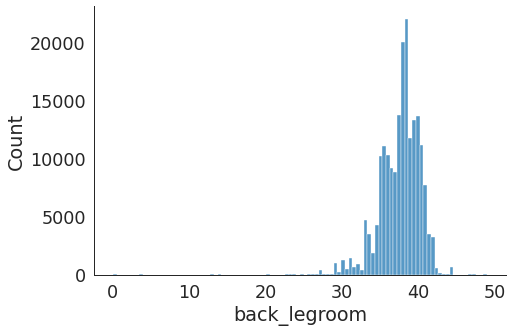

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="back_legroom", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["back_legroom"]

print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the back legroom feature using histogram")


Distribution of the back legroom feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='back_legroom'>

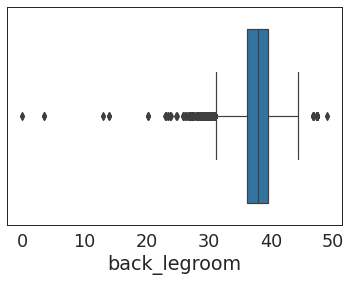

In [ ]:
array = df["back_legroom"].to_numpy()
#print(array)
print("Distribution of the back legroom feature using Box plot")
sns.boxplot(df['back_legroom'])


We can see that the data contains outliers from the box plot.

Induction of missing values:
We decided to assign the nulll values of the back legroom feature with the median value over the data set as the data has many ourliers.

In [ ]:
import math
med = df["back_legroom"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "back_legroom"])):

    df.loc[i,"back_legroom"] = med
   
 
   

**Statistics after induction of missing values:**

In [ ]:
print("Number of missing values = ", df["back_legroom"].isna().sum())

Number of missing values =  0


Distribution of the back legroom feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='back_legroom'>

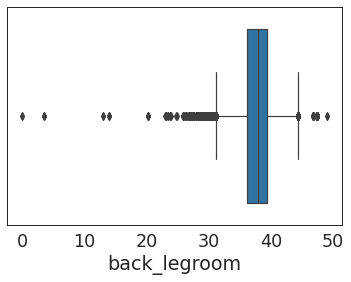

In [ ]:
array = df["back_legroom"].to_numpy()
#print(array)
print("Distribution of the back legroom feature using Box plot")
sns.boxplot(df['back_legroom'])

From the above figure, we can see that all distributions fit the data.

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["back_legroom"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.17774007621628687


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers

In [ ]:
des = df.describe()["back_legroom"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "back_legroom"] = (df.loc[i, "back_legroom"] - m)/std
print(df["back_legroom"])

0         1.114117
1         0.307987
2        -0.014465
3         0.831972
4        -0.619062
            ...   
199995   -1.667031
199996    0.066148
199997   -0.780288
199998   -0.095078
199999   -0.095078
Name: back_legroom, Length: 200000, dtype: float64


The mean =  3.6690650517812175e-15
The standard deviation =  0.9999999999999999
The minimum value = -15.1697062624842
The maximum value = 4.580475704445846
The median =  0.14676138533910127
The first quartile =  -0.6190619970520632
The third quartile =  0.7110522986799591
Distribution of the back legroom feature using histogram


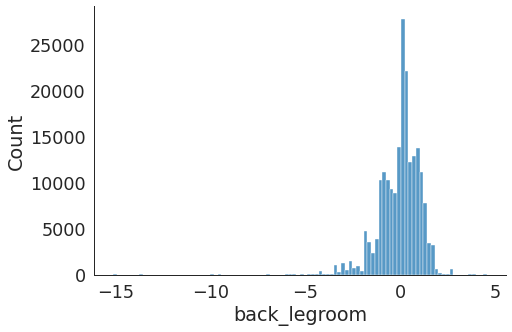

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="back_legroom", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["back_legroom"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the back legroom feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:37<00:00,  7.51s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
burr            0.154742  2003.645277 -2.814365e+06     inf      0.047365   
beta            0.173404  3282.088137 -2.791591e+06     inf      0.081382   
norm            0.217412  6241.368243 -2.746383e+06     inf      0.107179   
lognorm         0.222169  6457.831340 -2.742041e+06     inf      0.112654   
gamma           0.260608          inf -2.710126e+06     inf      0.124265   

         ks_pvalue  
burr           0.0  
beta           0.0  
norm           0.0  
lognorm        0.0  
gamma          0.0

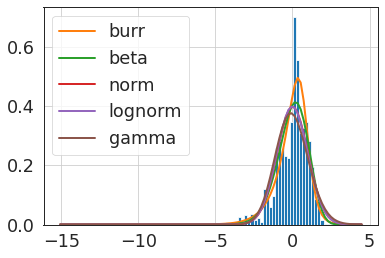

In [ ]:
BL = df["back_legroom"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   vin                   200000 non-null  object 
 2   back_legroom          200000 non-null  float64
 3   city                  200000 non-null  object 
 4   city_fuel_economy     176380 non-null  float64
 5   daysonmarket          200000 non-null  int64  
 6   dealer_zip            200000 non-null  object 
 7   engine_cylinders      194920 non-null  object 
 8   engine_displacement   191357 non-null  float64
 9   engine_type           194920 non-null  object 
 10  exterior_color        199996 non-null  object 
 11  fleet                 108332 non-null  object 
 12  frame_damaged         108332 non-null  object 
 13  franchise_dealer      200000 non-null  bool   
 14  franchise_make        160488 non-null  object 
 15  

**Front Legroom Feature:**

As we can see, the front legroom feature describes the space available for legs in the Front seats. So, it is mainly a distance so, it should be a numeric value. However, it is a string object in the data because the unit is included. As a result, the first step in cleaning the data in this feature will be removing the units and converting the data from strings to floats

In [ ]:

df["front_legroom"].unique()

array(['42.3 in', '41 in', '41.8 in', '40.9 in', '40.8 in', '45.5 in',
       '42.2 in', '41.6 in', '41.4 in', '46.1 in', '43.6 in', '41.5 in',
       nan, '40.3 in', '41.1 in', '41.3 in', '41.2 in', '43 in',
       '45.8 in', '44.1 in', '44.3 in', '42.5 in', '42.9 in', '44.5 in',
       '45.3 in', '42.4 in', '42.1 in', '43.9 in', '40.2 in', '39.9 in',
       '43.1 in', '42 in', '41.7 in', '40.5 in', '40.7 in', '44.2 in',
       '42.6 in', '--', '43.7 in', '43.3 in', '40.4 in', '42.8 in',
       '43.2 in', '43.5 in', '40.6 in', '41.9 in', '45 in', '39.6 in',
       '44 in', '43.8 in', '44.4 in', '39.1 in', '45.1 in', '37.7 in',
       '45.7 in', '39.8 in', '46.9 in', '39 in', '36.6 in', '45.4 in',
       '52.5 in', '67 in', '43.4 in', '40 in', '44.7 in', '42.7 in',
       '53.6 in', '46.3 in', '44.8 in', '39.5 in', '46.4 in', '40.1 in',
       '38.9 in', '38 in', '44.6 in', '39.4 in', '38.7 in', '39.3 in',
       '45.9 in', '46 in', '38.6 in', '38.4 in', '33 in'], dtype=object)

In [ ]:
from pandas.core.api import notnull
for i in range(0, len(df)):
  temp = df.at[i,"front_legroom"]
  if(temp != '--' and temp is not None ): 
    x= type("ojmlk") 
    if(type(temp) == x):
      temp1 = temp.replace(" in", '')
      df['front_legroom'] = df['front_legroom'].replace([temp],float(temp1))
   
  elif (temp == "--"):
      df['front_legroom'] = df['front_legroom'].replace([temp],None)

**Statistics of the Front legroom feature after converting it to float**

In [ ]:
print("Number of missing values = ", df["front_legroom"].isna().sum())

Number of missing values =  7521


**Statistics before induction of missing values:**

The mean =  42.06399815044758
The standard deviation =  1.4409755400728699
The minimum value = 33.0
The maximum value = 67.0
The median =  41.8
The first quartile =  41.0
The third quartile =  42.8
Distribution of the front legroom feature using histogram


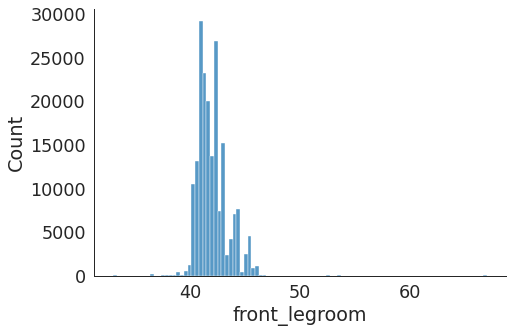

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="front_legroom", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["front_legroom"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the front legroom feature using histogram")

Distribution of the front legroom feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='front_legroom'>

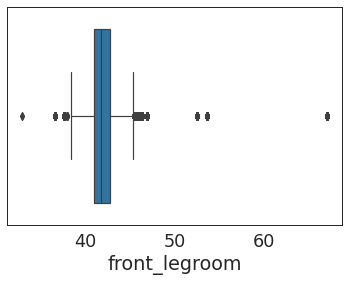

In [ ]:
array = df["front_legroom"].to_numpy()
#print(array)
print("Distribution of the front legroom feature using Box plot")
sns.boxplot(df['front_legroom'])

**Induction of missing values**

We will assign the null values to the median as we have outliers 

In [ ]:
import math
med = df["front_legroom"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "front_legroom"])):

    df.loc[i,"front_legroom"] = med

**Statistics after the induction of missing values:**

In [ ]:
print("Number of missing values = ", df["front_legroom"].isna().sum())

Number of missing values =  0


Distribution of the front legroom feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='front_legroom'>

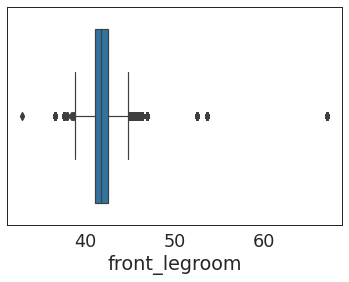

In [ ]:
array = df["front_legroom"].to_numpy()
#print(array)
print("Distribution of the front legroom feature using Box plot")
sns.boxplot(df['front_legroom'])

From the above plot, we can see that the data contain some outliers

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["front_legroom"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.0013241976729477189


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers.

In [ ]:
des = df.describe()["front_legroom"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "front_legroom"] = (df.loc[i, "front_legroom"] - m)/std
print(df["front_legroom"])

0         0.173862
1        -0.745182
2        -0.179617
3        -0.815878
4        -0.886574
            ...   
199995    0.032470
199996   -0.745182
199997   -0.886574
199998   -0.533095
199999    0.173862
Name: front_legroom, Length: 200000, dtype: float64


The mean =  -1.5116796703296131e-15
The standard deviation =  1.0
The minimum value = -6.4008361581296755
The maximum value = 17.6356929782857
The median =  -0.17961685223393328
The first quartile =  -0.6744865697483645
The third quartile =  0.38594853921113736
Distribution of the front legroom feature using histogram


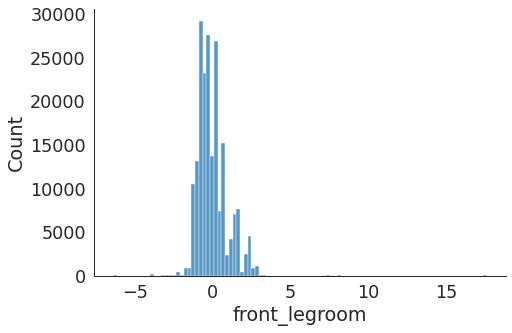

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="front_legroom", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["front_legroom"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the front legroom feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:37<00:00,  7.51s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm         0.238570  4956.143973 -2.727796e+06     inf      0.084713   
beta            0.241313          inf -2.725498e+06     inf      0.087083   
norm            0.325894  8157.518562 -2.665427e+06     inf      0.118009   
burr            0.964720   810.807161 -2.448349e+06     inf      0.353142   
gamma           2.475981          inf -2.259851e+06     inf      0.925899   

         ks_pvalue  
lognorm        0.0  
beta           0.0  
norm           0.0  
burr           0.0  
gamma          0.0

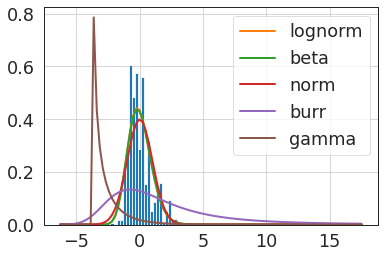

In [ ]:
BL = df["front_legroom"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that all distributions fit the data except of the gamma distribution

**Fuel Tank Volume Feature:**
As we can see, the Fuel tank volume feature describes the number of gallons in the fuel tank. So, it is mainly a distance so, it should be a numeric value. However, it is a string object in the data because the unit is included. As a result, the first step in cleaning the data in this feature will be removing the units and converting the data from strings to floats

In [ ]:
df["fuel_tank_volume"].unique()

array(['14.8 gal', '19.4 gal', '18 gal', '15.6 gal', '21.1 gal',
       '18.5 gal', '15.8 gal', '16.5 gal', '17 gal', '20.5 gal',
       '19.5 gal', '15.9 gal', '12.8 gal', '16.4 gal', nan, '14 gal',
       '13.2 gal', '24.6 gal', '17.4 gal', '12.7 gal', '33.5 gal',
       '15.3 gal', '18.8 gal', '16.6 gal', '11.9 gal', '22 gal',
       '19.2 gal', '28 gal', '14.5 gal', '18.6 gal', '21.5 gal', '24 gal',
       '13.5 gal', '31 gal', '20 gal', '22.5 gal', '14.4 gal', '16 gal',
       '19 gal', '17.7 gal', '15.7 gal', '14.7 gal', '12.4 gal',
       '11.4 gal', '21.9 gal', '9.2 gal', '18.1 gal', '21 gal',
       '10.8 gal', '19.8 gal', '15.5 gal', '17.2 gal', '13.6 gal',
       '13 gal', '16.9 gal', '14.9 gal', '12 gal', '23.3 gal', '18.4 gal',
       '26 gal', '22.7 gal', '17.3 gal', '16.2 gal', '15.1 gal',
       '17.9 gal', '10.5 gal', '23 gal', '14.3 gal', '19.1 gal',
       '27.8 gal', '17.1 gal', '11.1 gal', '9.3 gal', '21.7 gal',
       '13.7 gal', '9.5 gal', '14.2 gal', '27.7 gal',

In [ ]:
from pandas.core.api import notnull
for i in range(0, len(df)):
  temp = df.at[i,"fuel_tank_volume"]
  if(temp != '--' and temp is not None ): 
    x= type("ojmlk") 
    if(type(temp) == x):
      temp1 = temp.replace(" gal", '')
      df['fuel_tank_volume'] = df['fuel_tank_volume'].replace([temp],float(temp1))
   
  elif (temp == "--"):
      df['fuel_tank_volume'] = df['fuel_tank_volume'].replace([temp],None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   vin                   200000 non-null  object 
 2   back_legroom          200000 non-null  float64
 3   city                  200000 non-null  object 
 4   city_fuel_economy     176380 non-null  float64
 5   daysonmarket          200000 non-null  int64  
 6   dealer_zip            200000 non-null  object 
 7   engine_cylinders      194920 non-null  object 
 8   engine_displacement   191357 non-null  float64
 9   engine_type           194920 non-null  object 
 10  exterior_color        199996 non-null  object 
 11  fleet                 108332 non-null  object 
 12  frame_damaged         108332 non-null  object 
 13  franchise_dealer      200000 non-null  bool   
 14  franchise_make        160488 non-null  object 
 15  

**Statistics of the fuel tank volume feature after converting it to float**

In [ ]:
print("Number of missing values = ", df["fuel_tank_volume"].isna().sum())

Number of missing values =  7464


Statistics before induction of missing values

The mean =  17.054020546806832
The standard deviation =  3.7535953714758654
The minimum value = 1.9
The maximum value = 44.0
The median =  16.4
The first quartile =  14.3
The third quartile =  19.0
Distribution of the fuel_tank_volume feature using histogram


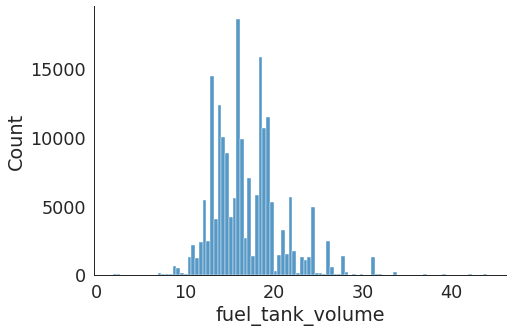

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="fuel_tank_volume", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["fuel_tank_volume"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the fuel_tank_volume feature using histogram")

Distribution of the front legroom feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_tank_volume'>

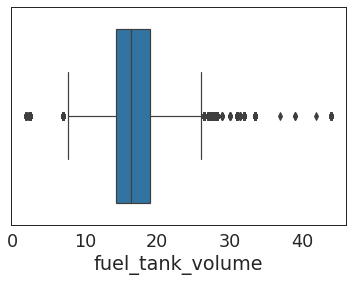

In [ ]:
array = df["fuel_tank_volume"].to_numpy()
#print(array)
print("Distribution of the front legroom feature using Box plot")
sns.boxplot(df['fuel_tank_volume'])

**Induction of Missing values:**

We will assign the null values to the median of the data set




In [ ]:
import math
med = df["fuel_tank_volume"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "fuel_tank_volume"])):

    df.loc[i,"fuel_tank_volume"] = med

**Statistcs after induction of missing values:**

In [ ]:
print("Number of missing values = ", df["fuel_tank_volume"].isna().sum())

Number of missing values =  0


Distribution of the front legroom feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_tank_volume'>

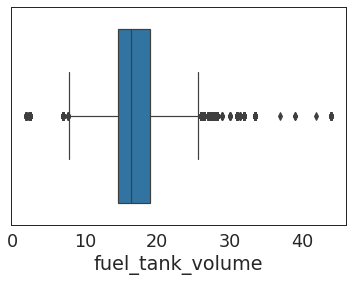

In [ ]:
array = df["fuel_tank_volume"].to_numpy()
#print(array)
print("Distribution of the front legroom feature using Box plot")
sns.boxplot(df['fuel_tank_volume'])

From the above figure, we can see that the data contains many outliers

From this figure, we can see that any type of distributions fits this data

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["fuel_tank_volume"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.36277600247716


The final step is to scale the data of this feature using standard z scaling

In [ ]:
des = df.describe()["fuel_tank_volume"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "fuel_tank_volume"] = (df.loc[i, "fuel_tank_volume"] - m)/std


The mean =  2.722799763432704e-16
The standard deviation =  1.0
The minimum value = -4.10575970321291
The maximum value = 7.319019583451802
The median =  -0.17085947383907815
The first quartile =  -0.6864670901018558
The third quartile =  0.5347088431520921
Distribution of the ffuel_tank_volume feature using histogram


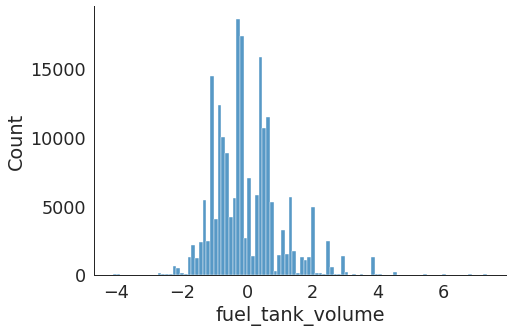

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="fuel_tank_volume", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["fuel_tank_volume"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the ffuel_tank_volume feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:26<00:00,  5.31s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
burr            1.120669  1067.580292 -2.418381e+06     inf      0.065565   
lognorm         1.123405  1342.992987 -2.417905e+06     inf      0.068449   
gamma           1.137255  1371.072149 -2.415454e+06     inf      0.076981   
norm            1.216863  1533.524322 -2.401935e+06     inf      0.103480   
beta            3.823680          inf -2.172923e+06     NaN      0.999900   

         ks_pvalue  
burr           0.0  
lognorm        0.0  
gamma          0.0  
norm           0.0  
beta           0.0

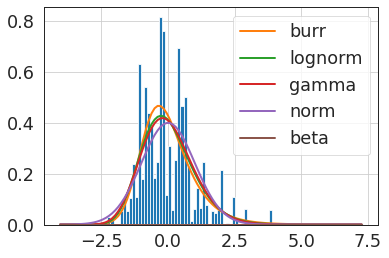

In [ ]:
BL = df["fuel_tank_volume"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

In [ ]:
print(df["fuel_tank_volume"])

0        -0.605055
1         0.643258
2         0.263336
3        -0.387957
4         1.104591
            ...   
199995   -1.392035
199996   -0.686467
199997   -0.822153
199998    0.751807
199999   -1.744820
Name: fuel_tank_volume, Length: 200000, dtype: float64


**Height Feature:**

As we can see, the height feature describes the height of the car. So, it is mainly a distance so, it should be a numeric value. However, it is a string object in the data because the unit is included. As a result, the first step in cleaning the data in this feature will be removing the units and converting the data from strings to floats

In [ ]:
df["height"].unique()

array(['57.1 in', '70.7 in', '65.1 in', '65.4 in', '69.5 in', '58.1 in',
       '54.2 in', '68.5 in', '67.8 in', '58.7 in', '71.5 in', '67.4 in',
       '56.9 in', '56.3 in', '65.2 in', nan, '56.5 in', '57.3 in',
       '69.3 in', '66.2 in', '57.8 in', '66.5 in', '77.7 in', '66.1 in',
       '58.9 in', '58.5 in', '69.9 in', '64.4 in', '66.3 in', '62.7 in',
       '66.7 in', '67.7 in', '77.2 in', '67 in', '65.7 in', '58 in',
       '71 in', '73.6 in', '75.9 in', '64.1 in', '54.6 in', '64.6 in',
       '64.8 in', '74.4 in', '57.4 in', '58.2 in', '57.9 in', '70.2 in',
       '66.4 in', '53.1 in', '68.6 in', '65.5 in', '58.4 in', '71.9 in',
       '69.6 in', '55.7 in', '70.6 in', '76.5 in', '59.2 in', '66.6 in',
       '69 in', '68.1 in', '68.7 in', '67.9 in', '67.2 in', '55.6 in',
       '72.7 in', '50.7 in', '63.6 in', '62.5 in', '55.4 in', '55.1 in',
       '67.3 in', '67.1 in', '64.9 in', '75.8 in', '57.5 in', '56.4 in',
       '61.6 in', '54 in', '76.8 in', '56.8 in', '56 in', '57.7 i

In [ ]:
from pandas.core.api import notnull
for i in range(0, len(df)):
  temp = df.at[i,"height"]
  if(temp != '--' and temp is not None ): 
    x= type("ojmlk") 
    if(type(temp) == x):
      temp1 = temp.replace(" in", '')
      df['height'] = df['height'].replace([temp],float(temp1))
   
  elif (temp == "--"):
      df['height'] = df['height'].replace([temp],None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   vin                   200000 non-null  object 
 2   back_legroom          200000 non-null  float64
 3   city                  200000 non-null  object 
 4   city_fuel_economy     176380 non-null  float64
 5   daysonmarket          200000 non-null  int64  
 6   dealer_zip            200000 non-null  object 
 7   engine_cylinders      194920 non-null  object 
 8   engine_displacement   191357 non-null  float64
 9   engine_type           194920 non-null  object 
 10  exterior_color        199996 non-null  object 
 11  fleet                 108332 non-null  object 
 12  frame_damaged         108332 non-null  object 
 13  franchise_dealer      200000 non-null  bool   
 14  franchise_make        160488 non-null  object 
 15  

**Statistics of the height feature after converting it to float**

In [ ]:
print("Number of missing values = ", df["height"].isna().sum())

Number of missing values =  7462


**Statistics before induction of missing values:**

The mean =  63.67720346113496
The standard deviation =  5.789833095969234
The minimum value = 43.9
The maximum value = 88.0
The median =  65.3
The first quartile =  57.8
The third quartile =  68.0
Distribution of the height feature using histogram


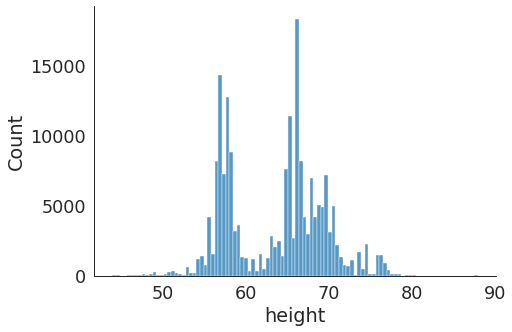

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="height", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["height"]

print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the height feature using histogram")


Distribution of the height feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

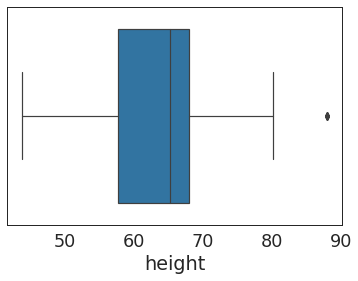

In [ ]:
array = df["height"].to_numpy()
#print(array)
print("Distribution of the height feature using Box plot")
sns.boxplot(df['height'])

We can see that the data contains a single outlier from the box plot.

Induction of missing values:
We decided to assign the nulll values to median value over the data set.

In [ ]:
import math
med = df["height"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "height"])):

    df.loc[i,"height"] = med

**Statistics after induction of missing values:**

In [ ]:
print("Number of missing values = ", df["height"].isna().sum())

Number of missing values =  0


Distribution of the height feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

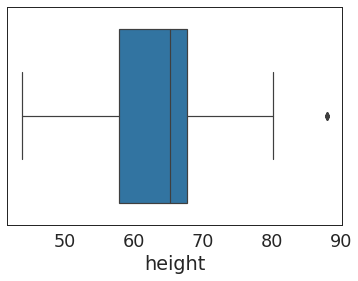

In [ ]:
array = df["height"].to_numpy()
#print(array)
print("Distribution of the height feature using Box plot")
sns.boxplot(df['height'])

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["height"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.21775372723988615


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers

In [ ]:
des = df.describe()["height"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "height"] = (df.loc[i, "height"] - m)/std
print(df["height"])

0        -1.166745
1         1.223784
2         0.239448
3         0.292181
4         1.012855
            ...   
199995   -1.166745
199996    0.573420
199997    0.204294
199998   -1.043703
199999   -1.430407
Name: height, Length: 200000, dtype: float64


The mean =  1.4934187220205786e-15
The standard deviation =  1.0
The minimum value = -3.486965425715244
The maximum value = 4.264678549737734
The median =  0.27460330613722134
The first quartile =  -1.0261260684285842
The third quartile =  0.7140389056526963
Distribution of the height feature using histogram


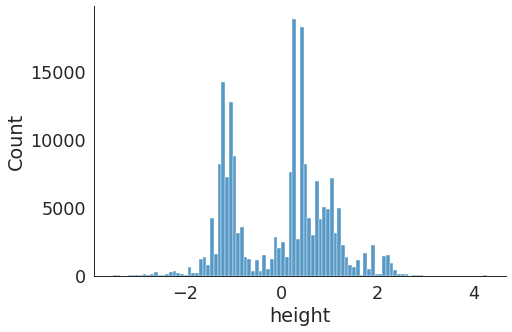

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="height", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["height"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the height feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:36<00:00,  7.38s/it]


sumsquare_error         aic           bic  kl_div  ks_statistic  \
beta            3.740025  906.595091 -2.177347e+06     inf      0.146689   
norm            3.789201  703.593858 -2.174759e+06     inf      0.144762   
gamma           3.791526  704.330852 -2.174624e+06     inf      0.144697   
lognorm         3.822743  694.498215 -2.172984e+06     inf      0.150853   
burr            3.995570  791.020544 -2.164128e+06     inf      0.198569   

         ks_pvalue  
beta           0.0  
norm           0.0  
gamma          0.0  
lognorm        0.0  
burr           0.0

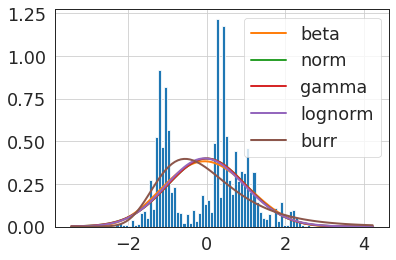

In [ ]:
BL = df["height"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that the  normal distribution fits the data the most

**Length Feature:**

As we can see, the length feature describes the length of the car in inches. So, it is mainly a distance so, it should be a numeric value. However, it is a string object in the data because the unit is included. As a result, the first step in cleaning the data in this feature will be removing the units and converting the data from strings to floats

In [ ]:
df["length"].unique()

array(['192.2 in', '204.3 in', '182.5 in', '182.3 in', '192.4 in',
       '191.1 in', '182.6 in', '201.4 in', '174.7 in', '200.4 in',
       '174.4 in', '196.2 in', '192.9 in', '179.1 in', '176.4 in', nan,
       '182.7 in', '183.1 in', '189.8 in', '182 in', '193.8 in',
       '166.6 in', '220.8 in', '201.3 in', '198.4 in', '195 in',
       '173.4 in', '182.1 in', '159 in', '193.4 in', '192.5 in',
       '206.5 in', '180.9 in', '191.8 in', '178.3 in', '195.5 in',
       '198.3 in', '188.4 in', '210.7 in', '180.6 in', '171.4 in',
       '187.3 in', '173 in', '224.4 in', '185.1 in', '200.1 in',
       '190.7 in', '191.6 in', '190.9 in', '191.7 in', '194.4 in',
       '181.5 in', '192.1 in', '188.3 in', '183.6 in', '178.1 in',
       '184.5 in', '198.8 in', '183.8 in', '181.9 in', '180.5 in',
       '178.7 in', '201.2 in', '205.2 in', '187.6 in', '196.5 in',
       '210 in', '169.5 in', '192.8 in', '203.7 in', '188.1 in',
       '180.7 in', '200.2 in', '203.2 in', '203.6 in', '179.4 in',


In [ ]:
from pandas.core.api import notnull
for i in range(0, len(df)):
  temp = df.at[i,"length"]
  if(temp != '--' and temp is not None ): 
    x= type("ojmlk") 
    if(type(temp) == x):
      temp1 = temp.replace(" in", '')
      df['length'] = df['length'].replace([temp],float(temp1))
   
  elif (temp == "--"):
      df['length'] = df['length'].replace([temp],None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   vin                   200000 non-null  object 
 2   back_legroom          200000 non-null  float64
 3   city                  200000 non-null  object 
 4   city_fuel_economy     176380 non-null  float64
 5   daysonmarket          200000 non-null  int64  
 6   dealer_zip            200000 non-null  object 
 7   engine_cylinders      194920 non-null  object 
 8   engine_displacement   191357 non-null  float64
 9   engine_type           194920 non-null  object 
 10  exterior_color        199996 non-null  object 
 11  fleet                 108332 non-null  object 
 12  frame_damaged         108332 non-null  object 
 13  franchise_dealer      200000 non-null  bool   
 14  franchise_make        160488 non-null  object 
 15  

**Statistics of the length feature after converting it to int**

In [ ]:
print("Number of missing values = ", df["length"].isna().sum())

Number of missing values =  7462


**Statistics before induction of missing values:**

The mean =  186.54059146765832
The standard deviation =  11.8135255971453
The minimum value = 106.1
The maximum value = 229.7
The median =  186.3
The first quartile =  180.5
The third quartile =  192.9
Distribution of the length feature using histogram


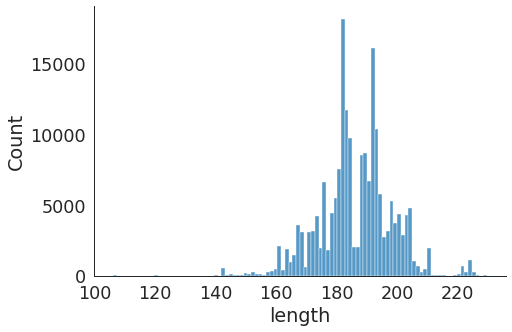

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="length", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["length"]

print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the length feature using histogram")

Distribution of the back legroom feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length'>

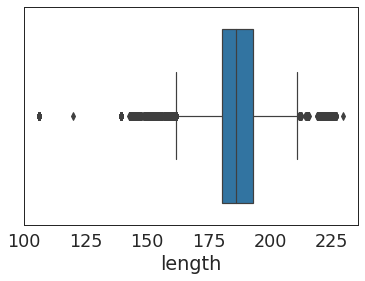

In [ ]:
array = df["length"].to_numpy()
#print(array)
print("Distribution of the back legroom feature using Box plot")
sns.boxplot(df['length'])

We can see that the data contains outliers from the box plot.

Induction of missing values:
We decided to assign the nulll values of the length feature with the median value over the data set.

In [ ]:
import math
med = df["length"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "length"])):

    df.loc[i,"length"] = med

**Statistics after induction of missing values:**

In [ ]:
print("Number of missing values = ", df["length"].isna().sum())

Number of missing values =  0


Distribution of the length feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length'>

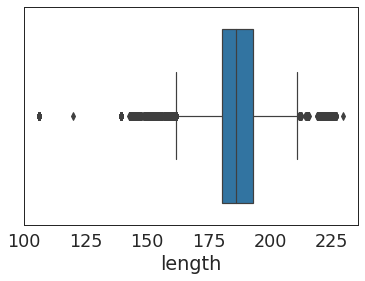

In [ ]:
array = df["length"].to_numpy()
#print(array)
print("Distribution of the length feature using Box plot")
sns.boxplot(df['length'])

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["length"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.3071307394151463


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers

In [ ]:
des = df.describe()["length"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "length"] = (df.loc[i, "length"] - m)/std
print(df["length"])

0         0.489027
1         1.532928
2        -0.347819
3        -0.365073
4         0.506282
            ...   
199995   -1.201920
199996   -0.485855
199997   -1.633284
199998    0.635691
199999   -0.252919
Name: length, Length: 200000, dtype: float64


The mean =  1.1102230246251565e-15
The standard deviation =  1.0000000000000002
The minimum value = -6.939061137115458
The maximum value = 3.724257715147681
The median =  -0.019982076019147876
The first quartile =  -0.520364352258034
The third quartile =  0.5494184452182037
Distribution of the length feature using histogram


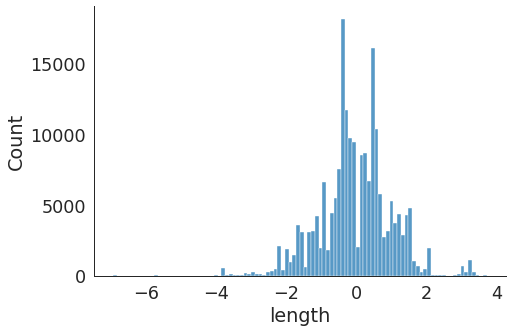

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="length", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["length"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the length feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:32<00:00,  6.47s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
beta            0.727471  1313.871206 -2.504802e+06     inf      0.065029   
norm            0.729194  1393.625581 -2.504353e+06     inf      0.068432   
lognorm         0.729210  1435.565431 -2.504337e+06     inf      0.069157   
gamma           0.736037  1524.930360 -2.502473e+06     inf      0.072719   
burr            3.073100   578.934678 -2.216628e+06     inf      0.385939   

         ks_pvalue  
beta           0.0  
norm           0.0  
lognorm        0.0  
gamma          0.0  
burr           0.0

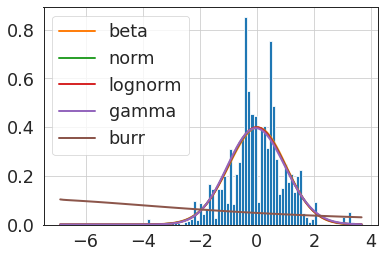

In [ ]:
BL = df["length"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that the burr,  beta and, normal distribution fits the data the most

**Maximum Seating Feature:**

As we can see, the maximum seating feature describes the number of seats of the car. So, it is mainly a number so, it should be a numeric value. However, it is a string object in the data because the unit is included. As a result, the first step in cleaning the data in this feature will be removing the units and converting the data from strings to integers.

In [ ]:
df["maximum_seating"].unique()

array(['5 seats', '8 seats', '7 seats', '4 seats', '6 seats', nan,
       '2 seats', '9 seats', '--', '3 seats'], dtype=object)

In [ ]:
from pandas.core.api import notnull
for i in range(0, len(df)):
  temp = df.at[i,"maximum_seating"]
  if(temp != '--' and temp is not None ): 
    x= type("ojmlk") 
    if(type(temp) == x):
      temp1 = temp.replace(" seats", '')
      df['maximum_seating'] = df['maximum_seating'].replace([temp],int(temp1))
   
  elif (temp == "--"):
      df['maximum_seating'] = df['maximum_seating'].replace([temp],None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   vin                   200000 non-null  object 
 2   back_legroom          200000 non-null  float64
 3   city                  200000 non-null  object 
 4   city_fuel_economy     176380 non-null  float64
 5   daysonmarket          200000 non-null  int64  
 6   dealer_zip            200000 non-null  object 
 7   engine_cylinders      194920 non-null  object 
 8   engine_displacement   191357 non-null  float64
 9   engine_type           194920 non-null  object 
 10  exterior_color        199996 non-null  object 
 11  fleet                 108332 non-null  object 
 12  frame_damaged         108332 non-null  object 
 13  franchise_dealer      200000 non-null  bool   
 14  franchise_make        160488 non-null  object 
 15  

**Statistics of the maximum seating feature after converting it to float**

In [ ]:
print("Number of missing values = ", df["maximum_seating"].isna().sum())

Number of missing values =  7462


Induction of missing values:
We decided to assign the nulll values of the maximum seating feature with the mode value over the data set.

In [ ]:
print(df["maximum_seating"].mode()[0])

5.0


The mean =  5.465487332370753
The standard deviation =  1.0809998416071442
The minimum value = 2.0
The maximum value = 9.0
The median =  5.0
The first quartile =  5.0
The third quartile =  5.0
Distribution of the maximum_seating feature using histogram


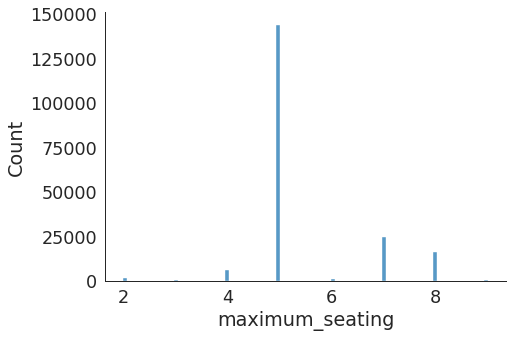

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="maximum_seating", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["maximum_seating"]

print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the maximum_seating feature using histogram")

In [ ]:
import math
mod = df["maximum_seating"].mode()[0]
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "maximum_seating"])):

    df.loc[i,"maximum_seating"] = mod

In [ ]:
lis = df["maximum_seating"].unique()
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"maximum_seating"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)


In [ ]:
for val in lis:
  df[str(val)+ " seats"] = new_cols[val]

In [ ]:
df.keys()

Index(['Unnamed: 0', 'vin', 'back_legroom', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_cylinders', 'engine_displacement',
       'engine_type', 'exterior_color', 'fleet', 'frame_damaged',
       'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_new', 'latitude', 'length', 'listed_date', 'listing_color',
       'listing_id', 'longitude', 'major_options', 'make_name',
       'maximum_seating', 'mileage', 'model_name', 'owner_count', 'power',
       'price', 'salvage', 'savings_amount', 'seller_rating', 'sp_id',
       'sp_name', 'theft_title', 'torque', 'transmission',
       'transmission_display', 'trimId', 'trim_name', 'wheel_system',
       'wheel_system_display', 'wheelbase', 'width', 'year', 'Sedan',
       'SUV / Crossover', 'Coupe', 'Minivan', 'Hatchback', 'Wagon',
       'Convertible', '5.0 seats

Since the number of seats is a discrete variable, we decided to use it as a categorical feature.

**Wheel Base Feature:**

The wheel base feature describes the distance between the centre of the front wheels and the centre of the rear wheels. So, it is mainly a length so, it should be a numeric value. However, it is a string object in the data because the unit is included. As a result, the first step in cleaning the data in this feature will be removing the units and converting the data from strings to floats.


In [ ]:
df["wheelbase"].unique()

array(['111.4 in', '120.9 in', '104.3 in', '107.3 in', '113.8 in',
       '110.4 in', '110.6 in', '120.5 in', '103.1 in', '110.5 in',
       '111 in', '111.8 in', '106.3 in', '105.1 in', nan, '114.8 in',
       '106.6 in', '115.7 in', '101.2 in', '131 in', '114.7 in',
       '106.2 in', '111.7 in', '120.2 in', '117.5 in', '104.8 in',
       '99.2 in', '112.5 in', '109.8 in', '119 in', '105.9 in',
       '112.2 in', '117.3 in', '112.8 in', '118.4 in', '104.7 in',
       '102.2 in', '111.2 in', '103.8 in', '130 in', '105.7 in', '120 in',
       '109.3 in', '117.9 in', '103.9 in', '110.7 in', '106.5 in',
       '114.2 in', '110 in', '119.1 in', '113.1 in', '106.7 in',
       '119.8 in', '118.1 in', '100.4 in', '121.2 in', '107.9 in',
       '119.3 in', '121.6 in', '109.2 in', '100 in', '103.5 in',
       '104.9 in', '97.1 in', '106.9 in', '108.9 in', '109.4 in',
       '108.1 in', '100.6 in', '116.2 in', '103.7 in', '103.2 in',
       '103 in', '98 in', '122.5 in', '111.6 in', '114.5 in',

In [ ]:
from pandas.core.api import notnull
for i in range(0, len(df)):
  temp = df.at[i,"wheelbase"]
  if(temp != '--' and temp is not None ): 
    x= type("ojmlk") 
    if(type(temp) == x):
      temp1 = temp.replace(" in", '')
      df['wheelbase'] = df['wheelbase'].replace([temp],float(temp1))
   
  elif (temp == "--"):
      df['wheelbase'] = df['wheelbase'].replace([temp],None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 70 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   vin                   200000 non-null  object 
 2   back_legroom          200000 non-null  float64
 3   city                  200000 non-null  object 
 4   city_fuel_economy     176380 non-null  float64
 5   daysonmarket          200000 non-null  int64  
 6   dealer_zip            200000 non-null  object 
 7   engine_cylinders      194920 non-null  object 
 8   engine_displacement   191357 non-null  float64
 9   engine_type           194920 non-null  object 
 10  exterior_color        199996 non-null  object 
 11  fleet                 108332 non-null  object 
 12  frame_damaged         108332 non-null  object 
 13  franchise_dealer      200000 non-null  bool   
 14  franchise_make        160488 non-null  object 
 15  

**Statistics of the Wheel Base feature after converting it to float**

In [ ]:
print("Number of missing values = ", df["wheelbase"].isna().sum())

Number of missing values =  7462


**Statistics before induction of missing values:**

The mean =  109.74555100811267
The standard deviation =  6.226093577157509
The minimum value = 73.5
The maximum value = 140.6
The median =  109.3
The first quartile =  105.9
The third quartile =  112.7
Distribution of the wheelbase feature using histogram


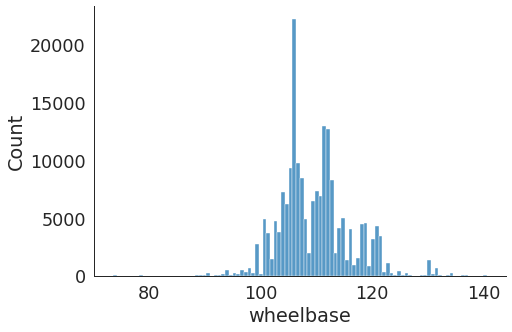

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="wheelbase", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["wheelbase"]

print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the wheelbase feature using histogram")

Distribution of the back legroom feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wheelbase'>

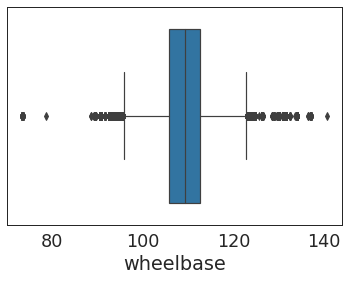

In [ ]:
array = df["wheelbase"].to_numpy()
#print(array)
print("Distribution of the back legroom feature using Box plot")
sns.boxplot(df['wheelbase'])


We can see that the data contains outliers from the box plot.

Induction of missing values:
We decided to assign the nulll values of to the median value over the data set.

In [ ]:
import math
med = df["wheelbase"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "wheelbase"])):

    df.loc[i,"wheelbase"] = med

**Statistics after induction of missing values:**

In [ ]:
print("Number of missing values = ", df["wheelbase"].isna().sum())

Number of missing values =  0


Distribution of the wheelbase feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wheelbase'>

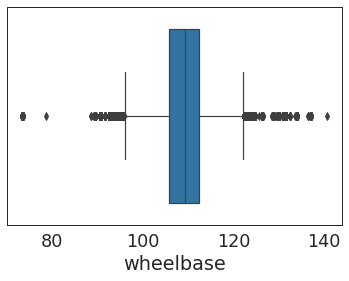

In [ ]:
array = df["wheelbase"].to_numpy()
#print(array)
print("Distribution of the wheelbase feature using Box plot")
sns.boxplot(df['wheelbase'])

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["wheelbase"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.3556109205093918


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers

In [ ]:
des = df.describe()["wheelbase"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "wheelbase"] = (df.loc[i, "wheelbase"] - m)/std
print(df["wheelbase"])

0         0.273524
1         1.828498
2        -0.888615
3        -0.397571
4         0.666359
            ...   
199995   -1.330555
199996   -0.626725
199997   -1.494237
199998    0.813673
199999   -0.561252
Name: wheelbase, Length: 200000, dtype: float64


The mean =  -1.934949978021905e-15
The standard deviation =  1.0000000000000002
The minimum value = -5.930006363690971
The maximum value = 5.053024447907412
The median =  -0.07020751040897208
The first quartile =  -0.6267247199385461
The third quartile =  0.4535733926776876
Distribution of the wheelbase feature using histogram


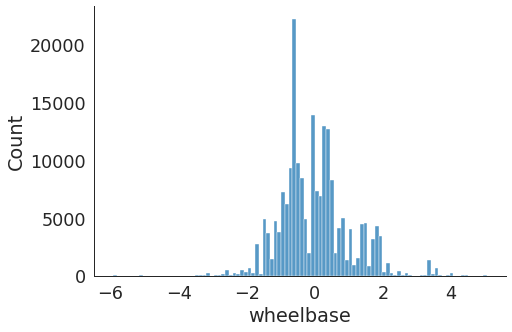

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="wheelbase", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["wheelbase"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the wheelbase feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:31<00:00,  6.32s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
burr            0.897730  1151.795558 -2.462743e+06     inf      0.065991   
lognorm         0.939672  1700.884169 -2.453623e+06     inf      0.071661   
gamma           0.950438  1616.393099 -2.451344e+06     inf      0.074664   
beta            0.958686  1651.904550 -2.449604e+06     inf      0.072360   
norm            1.003672  1212.143953 -2.440457e+06     inf      0.086617   

         ks_pvalue  
burr           0.0  
lognorm        0.0  
gamma          0.0  
beta           0.0  
norm           0.0

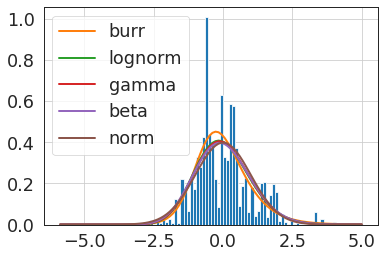

In [ ]:
BL = df["wheelbase"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that the burr, the lognorm,  and normal distribution fits the data the most

**Width Feature:**

The width feature maiinly describes the width of the car. So, it is mainly a length so, it should be a numeric value. However, it is a string object in the data because the unit is included. As a result, the first step in cleaning the data in this feature will be removing the units and converting the data from strings to floats.

In [ ]:
df["width"].unique()

array(['73.3 in', '78.6 in', '73.6 in', '72.4 in', '83.7 in', '73.4 in',
       '79.4 in', '89.3 in', '81.3 in', '72.9 in', '71.6 in', '77.7 in',
       '73.2 in', '69.9 in', '73 in', nan, '70.9 in', '84.8 in',
       '79.6 in', '91.8 in', '83.3 in', '84.3 in', '75 in', '71.1 in',
       '69.7 in', '75.4 in', '74.6 in', '83.5 in', '78.4 in', '68.7 in',
       '90.2 in', '73.8 in', '81 in', '71.4 in', '79.8 in', '80 in',
       '80.5 in', '70.8 in', '74.5 in', '70.7 in', '72.2 in', '71.7 in',
       '84.9 in', '74.7 in', '82.2 in', '81.8 in', '77.2 in', '72 in',
       '82.5 in', '85.6 in', '70.1 in', '85.5 in', '92.3 in', '71.3 in',
       '65.7 in', '72.8 in', '88.5 in', '75.8 in', '85.8 in', '78.2 in',
       '90.4 in', '70.6 in', '78.5 in', '68.5 in', '71.2 in', '81.7 in',
       '71 in', '69.3 in', '72.6 in', '68 in', '80.9 in', '74.4 in',
       '74.2 in', '82 in', '75.2 in', '83.9 in', '84.1 in', '72.5 in',
       '69.2 in', '79.1 in', '79.5 in', '67.9 in', '80.3 in', '79 in',
  

In [ ]:
from pandas.core.api import notnull
for i in range(0, len(df)):
  temp = df.at[i,"width"]
  if(temp != '--' and temp is not None ): 
    x= type("ojmlk") 
    if(type(temp) == x):
      temp1 = temp.replace(" in", '')
      df['width'] = df['width'].replace([temp],float(temp1))
   
  elif (temp == "--"):
      df['width'] = df['width'].replace([temp],None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 70 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   vin                   200000 non-null  object 
 2   back_legroom          200000 non-null  float64
 3   city                  200000 non-null  object 
 4   city_fuel_economy     176380 non-null  float64
 5   daysonmarket          200000 non-null  int64  
 6   dealer_zip            200000 non-null  object 
 7   engine_cylinders      194920 non-null  object 
 8   engine_displacement   191357 non-null  float64
 9   engine_type           194920 non-null  object 
 10  exterior_color        199996 non-null  object 
 11  fleet                 108332 non-null  object 
 12  frame_damaged         108332 non-null  object 
 13  franchise_dealer      200000 non-null  bool   
 14  franchise_make        160488 non-null  object 
 15  

**Statistics of the width feature after converting it to float**

In [ ]:
print("Number of missing values = ", df["width"].isna().sum())

Number of missing values =  7462


**Statistics before induction of missing values:**

The mean =  76.79055407244283
The standard deviation =  6.289611802146167
The minimum value = 57.0
The maximum value = 93.8
The median =  74.4
The first quartile =  72.2
The third quartile =  81.8
Distribution of the widthfeature using histogram


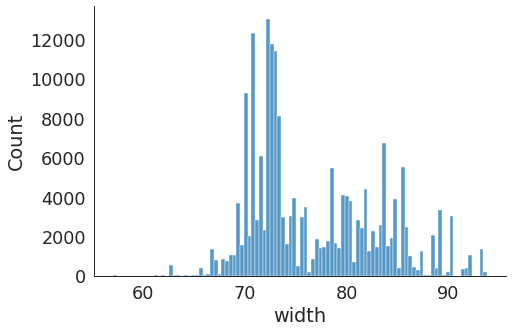

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="width", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["width"]

print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the widthfeature using histogram")

Distribution of the width feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='width'>

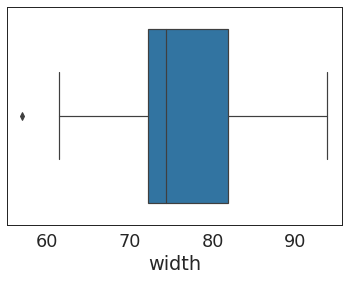

In [ ]:
array = df["width"].to_numpy()
#print(array)
print("Distribution of the width feature using Box plot")
sns.boxplot(df['width'])

We can see that the data contains a single outlier from the box plot.

Induction of missing values:
We decided to assign the nulll values to the median value over the data set.

In [ ]:
import math
med = df["width"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "width"])):

    df.loc[i,"width"] = med

**Statistics after induction of missing values:**

In [ ]:
print("Number of missing values = ", df["width"].isna().sum())

Number of missing values =  0


Distribution of the width feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='width'>

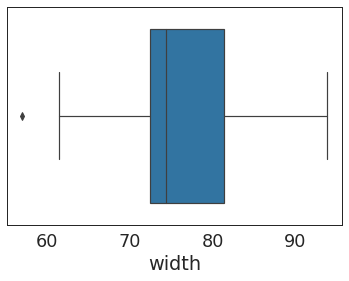

In [ ]:
array = df["width"].to_numpy()
#print(array)
print("Distribution of the width feature using Box plot")
sns.boxplot(df['width'])

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["width"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.3607677768722176


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers

In [ ]:
des = df.describe()["width"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "width"] = (df.loc[i, "width"] - m)/std
print(df["width"])

0        -0.549691
1         0.306837
2        -0.501208
3        -0.695139
4         1.131043
            ...   
199995   -1.422380
199996   -0.598174
199997   -1.099162
199998    0.872469
199999   -0.824426
Name: width, Length: 200000, dtype: float64


The mean =  -2.5360691324749497e-15
The standard deviation =  1.0
The minimum value = -3.183918800360463
The maximum value = 2.7632948430240964
The median =  -0.3719210450645017
The first quartile =  -0.6951391778571409
The third quartile =  0.7593424197097353
Distribution of the width feature using histogram


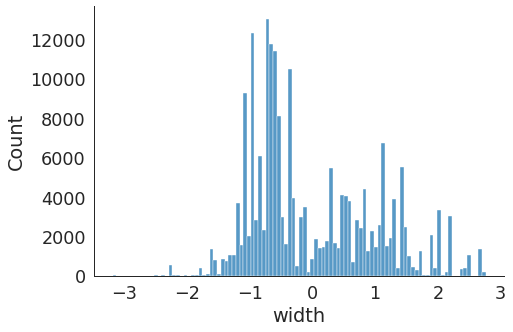

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="width", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["width"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the width feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:29<00:00,  5.91s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
burr            3.438950   864.464108 -2.194132e+06     inf      0.100807   
lognorm         3.694892  1124.041642 -2.179788e+06     inf      0.126460   
gamma           3.885367   760.368552 -2.169734e+06     inf      0.141702   
beta            3.982345   643.292879 -2.164792e+06     inf      0.148910   
norm            4.338460   486.926925 -2.147686e+06     inf      0.171010   

         ks_pvalue  
burr           0.0  
lognorm        0.0  
gamma          0.0  
beta           0.0  
norm           0.0

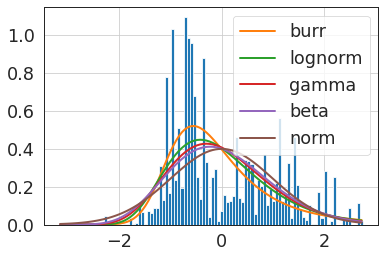

In [ ]:
BL = df["width"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that all distributions fits the data.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 70 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   vin                   200000 non-null  object 
 2   back_legroom          200000 non-null  float64
 3   city                  200000 non-null  object 
 4   city_fuel_economy     176380 non-null  float64
 5   daysonmarket          200000 non-null  int64  
 6   dealer_zip            200000 non-null  object 
 7   engine_cylinders      194920 non-null  object 
 8   engine_displacement   191357 non-null  float64
 9   engine_type           194920 non-null  object 
 10  exterior_color        199996 non-null  object 
 11  fleet                 108332 non-null  object 
 12  frame_damaged         108332 non-null  object 
 13  franchise_dealer      200000 non-null  bool   
 14  franchise_make        160488 non-null  object 
 15  

**City Fuel Economy Feature:**

In [ ]:
print("Number of missing values = ", df["city_fuel_economy"].isna().sum())

Number of missing values =  23620


**Statistics before induction of missing values:**

The mean =  23.597295611747363
The standard deviation =  8.999489188365361
The minimum value = 8.0
The maximum value = 127.0
The median =  22.0
The first quartile =  19.0
The third quartile =  26.0
Distribution of the city_fuel_economyfeature using histogram


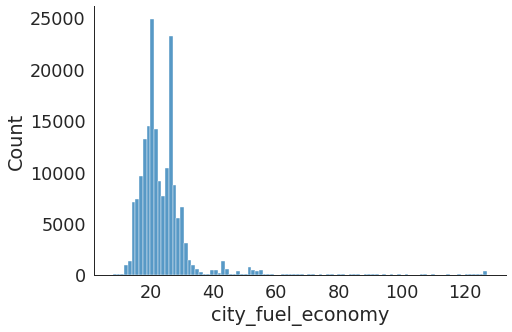

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="city_fuel_economy", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["city_fuel_economy"]

print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the city_fuel_economyfeature using histogram")

Distribution of the city_fuel_economyfeature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_fuel_economy'>

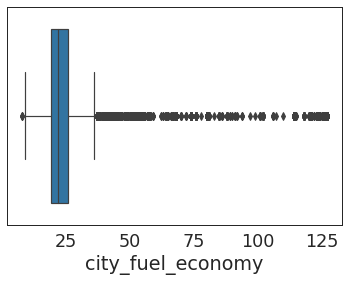

In [ ]:
array = df["city_fuel_economy"].to_numpy()
#print(array)
print("Distribution of the city_fuel_economyfeature using Box plot")
sns.boxplot(df['city_fuel_economy'])

We can see that the data contains outliers from the box plot.

Induction of missing values:
We decided to assign the nulll values to  the median value over the data set.

In [ ]:
import math
med = df["city_fuel_economy"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "city_fuel_economy"])):

    df.loc[i,"city_fuel_economy"] = med

**Statistics after induction of missing values:**

In [ ]:
print("Number of missing values = ", df["city_fuel_economy"].isna().sum())

Number of missing values =  0


Distribution of the city_fuel_economyfeature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_fuel_economy'>

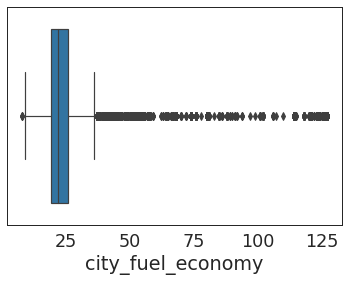

In [ ]:
array = df["city_fuel_economy"].to_numpy()
#print(array)
print("Distribution of the city_fuel_economyfeature using Box plot")
sns.boxplot(df['city_fuel_economy'])

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["city_fuel_economy"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  -0.1261213231720696


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers

In [ ]:
des = df.describe()["city_fuel_economy"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "city_fuel_economy"] = (df.loc[i, "city_fuel_economy"] - m)/std
print(df["city_fuel_economy"])

0         0.778467
1        -0.638786
2        -0.756891
3         0.187945
4        -0.874995
            ...   
199995    1.132780
199996    0.306049
199997    0.306049
199998   -0.638786
199999   -0.166368
Name: city_fuel_economy, Length: 200000, dtype: float64


The mean =  7.560174708487466e-17
The standard deviation =  1.0
The minimum value = -1.8198306485491644
The maximum value = 12.234598318635225
The median =  -0.16636841711570688
The first quartile =  -0.5206817524228763
The third quartile =  0.3060493632938524
Distribution of the back city_fuel_economy using histogram


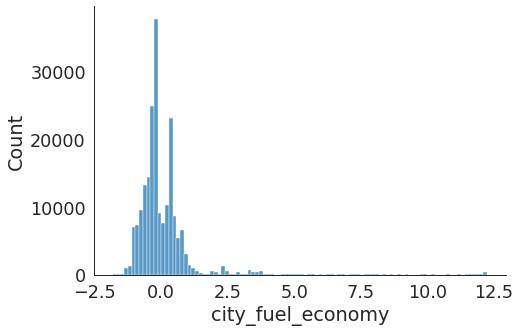

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="city_fuel_economy", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["city_fuel_economy"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the back city_fuel_economy using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:28<00:00,  5.61s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
burr            0.883749  1367.597690 -2.465882e+06     inf      0.095014   
lognorm         0.994490  1793.926958 -2.442283e+06     inf      0.095101   
beta            1.036616  2651.905277 -2.433973e+06     inf      0.119003   
norm            1.679144  4545.387143 -2.337533e+06     inf      0.170880   
gamma           3.628500   694.598206 -2.183414e+06     inf      0.315713   

         ks_pvalue  
burr           0.0  
lognorm        0.0  
beta           0.0  
norm           0.0  
gamma          0.0

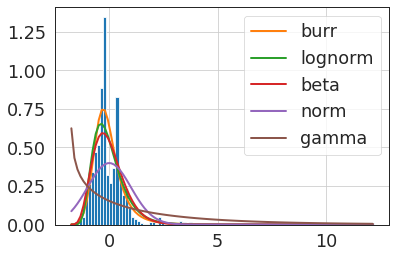

In [ ]:
BL = df["city_fuel_economy"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that all distribution fits the data.

**Days on market feature:**

In [ ]:
print("Number of missing values = ", df["daysonmarket"].isna().sum())

Number of missing values =  0


Notice that there are no missing data. 

**Statistics of the Days on market feature**

Distribution of the daysonmarket feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='daysonmarket'>

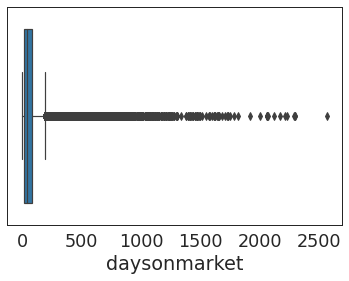

In [ ]:
array = df["daysonmarket"].to_numpy()
#print(array)
print("Distribution of the daysonmarket feature using Box plot")
sns.boxplot(df['daysonmarket'])

From the box plot, we can see that the data contains many ourliers

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["daysonmarket"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.0842938145609643


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers.

In [ ]:
des = df.describe()["daysonmarket"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "daysonmarket"] = (df.loc[i, "daysonmarket"] - m)/std
print(df["daysonmarket"])

0        -0.569755
1        -0.273349
2        -0.671644
3        -0.653119
4        -0.616068
            ...   
199995   -0.634594
199996   -0.606805
199997   -0.328925
199998   -0.625331
199999   -0.606805
Name: daysonmarket, Length: 200000, dtype: float64


The mean =  1.9930723738070812e-17
The standard deviation =  1.0
The minimum value = -0.7086950932508238
The maximum value = 23.068638315821786
The median =  -0.37523813854626054
The first quartile =  -0.5697546954572558
The third quartile =  0.06937113439315723
Distribution of the daysonmarket feature using histogram


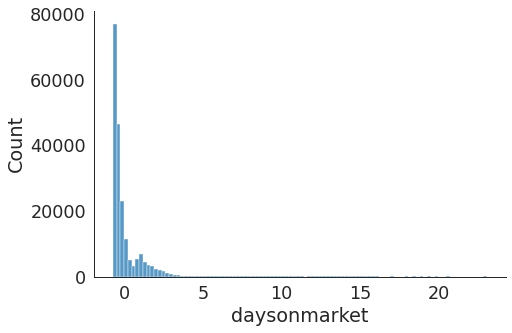

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="daysonmarket", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["daysonmarket"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the daysonmarket feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:30<00:00,  6.07s/it]


sumsquare_error           aic           bic  kl_div  ks_statistic  \
lognorm         0.062062   1386.426101 -2.997102e+06     inf      0.042789   
beta            0.261571   2793.500285 -2.709375e+06     inf      0.105068   
gamma           0.349036   2235.702460 -2.651694e+06     inf      0.275701   
burr            0.453860   1127.080418 -2.599159e+06     inf      0.146352   
norm            2.232247  17397.925179 -2.280588e+06     inf      0.239256   

             ks_pvalue  
lognorm  1.240925e-318  
beta      0.000000e+00  
gamma     0.000000e+00  
burr      0.000000e+00  
norm      0.000000e+00

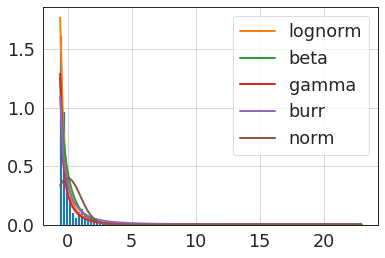

In [ ]:
BL = df["daysonmarket"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that all distributions fit the data except of the gamma distribution

**Engine Displacement feature:**





**Statistics of the engine displacement feature after converting it to float**

In [ ]:
print("Number of missing values = ", df["engine_displacement"].isna().sum())

Number of missing values =  8643


Statistics before induction of missing values

The mean =  2608.7334145079617
The standard deviation =  1021.0517063704747
The minimum value = 700.0
The maximum value = 8400.0
The median =  2400.0
The first quartile =  2000.0
The third quartile =  3500.0
Distribution of the engine_displacement feature using histogram


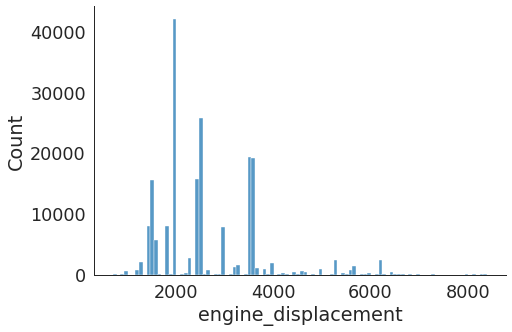

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="engine_displacement", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["engine_displacement"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the engine_displacement feature using histogram")

Distribution of the front legroom feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_displacement'>

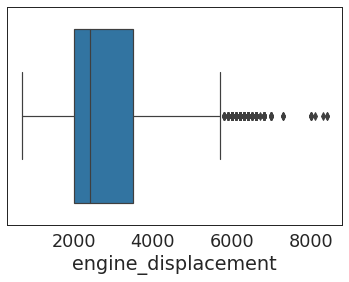

In [ ]:
array = df["engine_displacement"].to_numpy()
#print(array)
print("Distribution of the front legroom feature using Box plot")
sns.boxplot(df['engine_displacement'])

We can see that the data contains many outliers

**Induction of Missing values:**

We will assign the null values to the median of the data set

In [ ]:
import math
med = df["engine_displacement"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "engine_displacement"])):

    df.loc[i,"engine_displacement"] = med

**Statistcs after induction of missing values:**

In [ ]:
print("Number of missing values = ", df["engine_displacement"].isna().sum())

Number of missing values =  0


Distribution of the engine_displacement feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_displacement'>

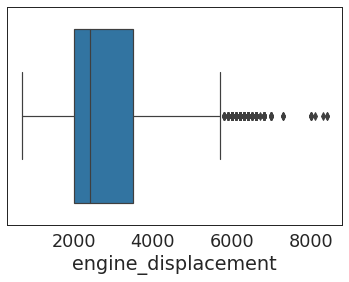

In [ ]:
array = df["engine_displacement"].to_numpy()
#print(array)
print("Distribution of the engine_displacement feature using Box plot")
sns.boxplot(df['engine_displacement'])

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["engine_displacement"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.3180809377575867


In [ ]:
des = df.describe()["engine_displacement"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "engine_displacement"] = (df.loc[i, "engine_displacement"] - m)/std
print(df["engine_displacement"])

0        -1.100101
1         1.000640
2        -0.299819
3        -0.599925
4         1.000640
            ...   
199995   -1.000066
199996   -0.099748
199997   -1.200137
199998    0.400428
199999   -1.100101
Name: engine_displacement, Length: 200000, dtype: float64


The mean =  -1.9596768652263563e-16
The standard deviation =  1.0
The minimum value = -1.9003837503982761
The maximum value = 5.802334964516411
The median =  -0.19978351463789068
The first quartile =  -0.5999247465815107
The third quartile =  0.9006048732070646
Distribution of the engine_displacement feature using histogram


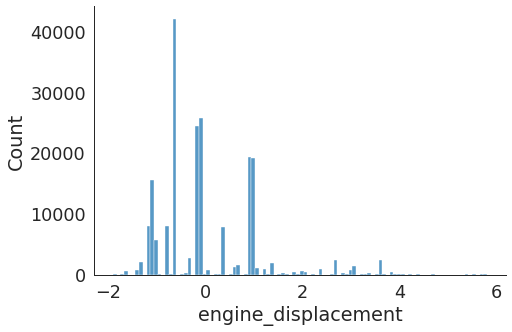

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="engine_displacement", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["engine_displacement"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the engine_displacement feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:29<00:00,  5.99s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm        13.343954   712.509498 -1.922965e+06     inf      0.127700   
burr           13.377809   692.606979 -1.922446e+06     inf      0.122525   
gamma          13.413658   766.776849 -1.921923e+06     inf      0.154559   
beta           13.423561   730.586526 -1.921763e+06     inf      0.158057   
norm           13.896664  1062.805017 -1.914860e+06     inf      0.217483   

         ks_pvalue  
lognorm        0.0  
burr           0.0  
gamma          0.0  
beta           0.0  
norm           0.0

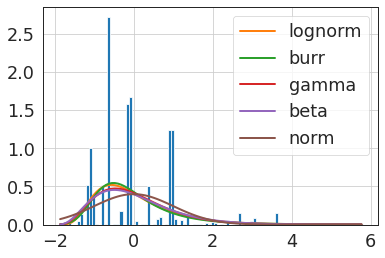

In [ ]:
BL = df["engine_displacement"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From this figure, we can see that any type of distributions fits this data

**Highway fuel economy**

In [ ]:
print("Number of missing values = ", df["highway_fuel_economy"].isna().sum())

Number of missing values =  23620


In [ ]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/





**Statistics before induction of missing values:**

The mean =  30.570314094568545
The standard deviation =  7.681590808418452
The minimum value = 11.0
The maximum value = 127.0
The median =  30.0
The first quartile =  26.0
The third quartile =  34.0
Distribution of the highway_fuel_economy feature using histogram


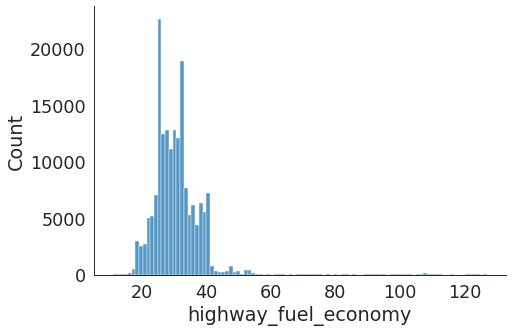

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="highway_fuel_economy", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["highway_fuel_economy"]

print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the highway_fuel_economy feature using histogram")

Distribution of the highway_fuel_economy feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway_fuel_economy'>

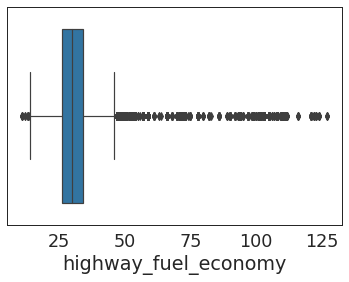

In [ ]:
array = df["highway_fuel_economy"].to_numpy()
#print(array)
print("Distribution of the highway_fuel_economy feature using Box plot")
sns.boxplot(df['highway_fuel_economy'])

We can see that the data contains outliers from the box plot.

Induction of missing values:
We decided to assign the nulll values of the back legroom feature with the median value over the data set.

In [ ]:
import math
med = df["highway_fuel_economy"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "highway_fuel_economy"])):

    df.loc[i,"highway_fuel_economy"] = med
   

**Statistics after induction of missing values:**

In [ ]:
print("Number of missing values = ", df["highway_fuel_economy"].isna().sum())

Number of missing values =  0


Distribution of the highway_fuel_economy feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway_fuel_economy'>

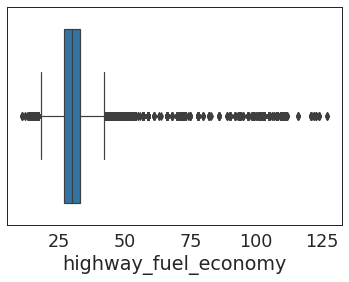

In [ ]:
array = df["highway_fuel_economy"].to_numpy()
#print(array)
print("Distribution of the highway_fuel_economy feature using Box plot")
sns.boxplot(df['highway_fuel_economy'])

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["highway_fuel_economy"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  -0.19267144508246922


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers

In [ ]:
des = df.describe()["highway_fuel_economy"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "highway_fuel_economy"] = (df.loc[i, "highway_fuel_economy"] - m)/std
print(df["highway_fuel_economy"])

0         1.038934
1        -0.485437
2        -1.178333
3        -0.346858
4        -0.901175
            ...   
199995    1.454671
199996    0.623196
199997    0.068879
199998   -0.485437
199999   -0.069700
Name: highway_fuel_economy, Length: 200000, dtype: float64


The mean =  -2.3234747459355276e-16
The standard deviation =  1.0
The minimum value = -2.7027042166465076
The maximum value = 13.372480736355234
The median =  -0.06969978468932571
The first quartile =  -0.48543732657730176
The third quartile =  0.3460377571986504
Distribution of the highway_fuel_economy feature using histogram


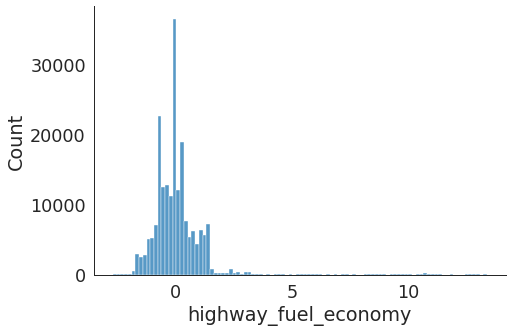

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="highway_fuel_economy", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["highway_fuel_economy"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the highway_fuel_economy feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:25<00:00,  5.10s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm         0.702715  2029.473923 -2.511739e+06     inf      0.098128   
beta            0.711398  2653.742151 -2.509270e+06     inf      0.097153   
gamma           0.715440  2618.577334 -2.508149e+06     inf      0.097456   
norm            0.868260  5187.129896 -2.469443e+06     inf      0.140893   
burr            2.637853   746.380160 -2.247173e+06     inf      0.394095   

         ks_pvalue  
lognorm        0.0  
beta           0.0  
gamma          0.0  
norm           0.0  
burr           0.0

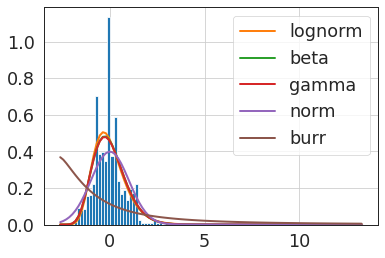

In [ ]:
BL = df["highway_fuel_economy"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that all distribution fits the data the most.

**Horse Power Feature**

In [ ]:
print("Number of missing values = ", df["horsepower"].isna().sum())

Number of missing values =  8643





**Statistics before induction of missing values:**

The mean =  227.62563689857177
The standard deviation =  80.30253670615194
The minimum value = 67.0
The maximum value = 808.0
The median =  201.0
The first quartile =  170.0
The third quartile =  283.0
Distribution of the horse power feature using histogram


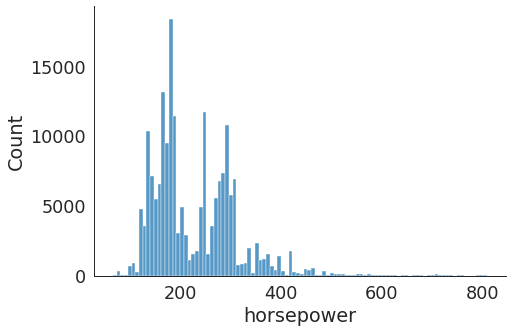

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="horsepower", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["horsepower"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the horse power feature using histogram")

Distribution of the horse power feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower'>

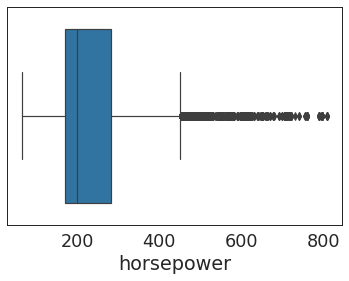

In [ ]:
array = df["horsepower"].to_numpy()
#print(array)
print("Distribution of the horse power feature using Box plot")
sns.boxplot(df['horsepower'])

**Induction of missing values**

We will assign the null values to the average 

In [ ]:
import math
med = df["horsepower"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "horsepower"])):

    df.loc[i,"horsepower"] = med

**Statistics after the induction of missing values:**

In [ ]:
print("Number of missing values = ", df["horsepower"].isna().sum())

Number of missing values =  0


Distribution of the horse power feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower'>

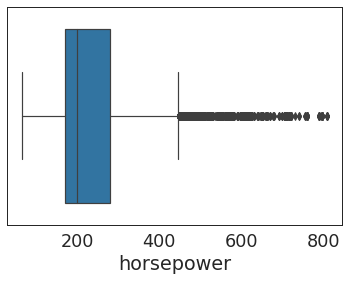

In [ ]:
array = df["horsepower"].to_numpy()
#print(array)
print("Distribution of the horse power feature using Box plot")
sns.boxplot(df['horsepower'])

From the above plot, we can see that the data contain some outliers

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["horsepower"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.5850007910086158


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers.

In [ ]:
des = df.describe()["horsepower"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "horsepower"] = (df.loc[i, "horsepower"] - m)/std
print(df["horsepower"])

0        -0.437864
1         1.060842
2         0.171780
3         0.324190
4         0.717918
            ...   
199995   -1.352328
199996   -0.298154
199997   -1.123712
199998    1.060842
199999   -0.958600
Name: horsepower, Length: 200000, dtype: float64


The mean =  3.396394276933279e-17
The standard deviation =  1.0000000000000002
The minimum value = -2.0254756938658662
The maximum value = 7.385889065757644
The median =  -0.3235554809245027
The first quartile =  -0.7172832913810868
The third quartile =  0.6925162879957144
Distribution of the horse power feature using histogram


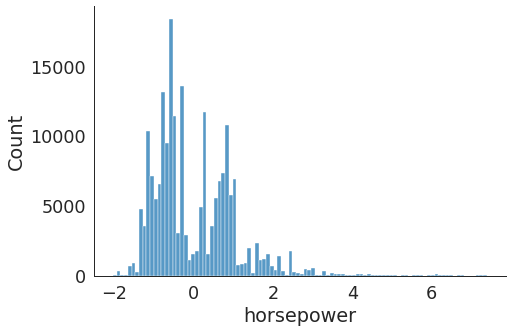

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="horsepower", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["horsepower"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the horse power feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:28<00:00,  5.74s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm         1.426094   866.677358 -2.370190e+06     inf      0.088815   
burr            1.450230   825.393045 -2.366821e+06     inf      0.087863   
gamma           1.458917   983.715510 -2.365639e+06     inf      0.105102   
beta            1.481699  1110.684868 -2.362528e+06     inf      0.114524   
norm            1.768502  1644.186354 -2.327164e+06     inf      0.157282   

         ks_pvalue  
lognorm        0.0  
burr           0.0  
gamma          0.0  
beta           0.0  
norm           0.0

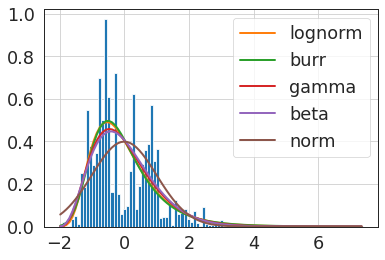

In [ ]:
BL = df["horsepower"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that all distributions fit the data

**Mileage Feature:**

**Statistics before induction of missing values:**

In [ ]:
print("Number of missing values = ", df["mileage"].isna().sum())

Number of missing values =  8951


The mean =  31163.308214123077
The standard deviation =  43620.178024068344
The minimum value = 0.0
The maximum value = 357549.0
The median =  12146.0
The first quartile =  6.0
The third quartile =  44147.0
Distribution of the mileage feature using histogram


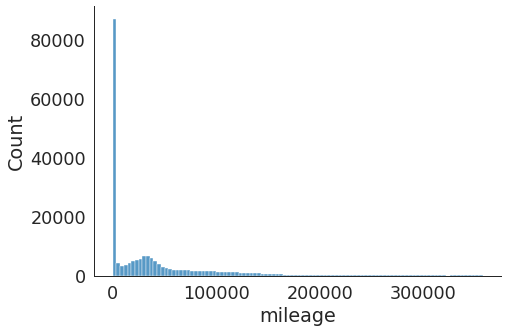

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="mileage", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["mileage"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the mileage feature using histogram")

Distribution of the mileage feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage'>

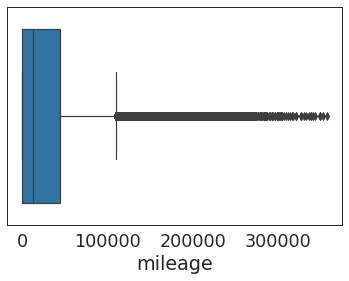

In [ ]:
array = df["mileage"].to_numpy()
#print(array)
print("Distribution of the mileage feature using Box plot")
sns.boxplot(df['mileage'])

**Induction of missing values**

We will assign the null values to the median 

In [ ]:
import math
med = df["mileage"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "mileage"])):

    df.loc[i,"mileage"] = med

**Statistics after the induction of missing values:**

In [ ]:
print("Number of missing values = ", df["mileage"].isna().sum())

Number of missing values =  0


Distribution of the mileage feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage'>

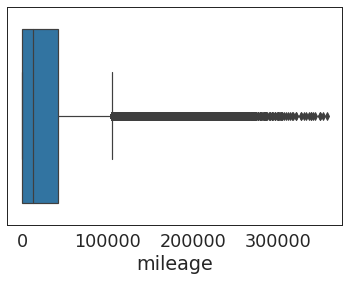

In [ ]:
array = df["mileage"].to_numpy()
#print(array)
print("Distribution of the mileage feature using Box plot")
sns.boxplot(df['mileage'])

From the above plot, we can see that the data contain some outliers

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["mileage"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  -0.4599742399040032


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers.

In [ ]:
des = df.describe()["mileage"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "mileage"] = (df.loc[i, "mileage"] - m)/std
print(df["mileage"])

0        -0.424306
1        -0.707860
2         0.660646
3        -0.707883
4        -0.038707
            ...   
199995   -0.707743
199996   -0.289724
199997   -0.707953
199998    0.598073
199999   -0.707883
Name: mileage, Length: 200000, dtype: float64


The mean =  1.957545237019076e-17
The standard deviation =  0.9999999999999998
The minimum value = -0.7079997524593488
The maximum value = 7.643248221016127
The median =  -0.42430644640665915
The first quartile =  -0.7078362539295967
The third quartile =  0.2797707758046688
Distribution of the mileagefeature using histogram


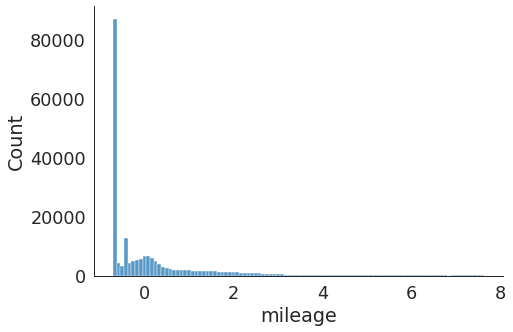

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="mileage", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["mileage"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the mileagefeature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:34<00:00,  6.92s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
gamma           7.310174  1228.546542 -2.043324e+06     inf      0.287183   
burr            8.525800   870.119727 -2.012546e+06     inf      0.224865   
lognorm        13.741860   828.525021 -1.917089e+06     inf      0.199205   
beta           15.370322   660.542750 -1.894678e+06     inf      0.387196   
norm           24.428707  1971.374311 -1.802038e+06     inf      0.239472   

         ks_pvalue  
gamma          0.0  
burr           0.0  
lognorm        0.0  
beta           0.0  
norm           0.0

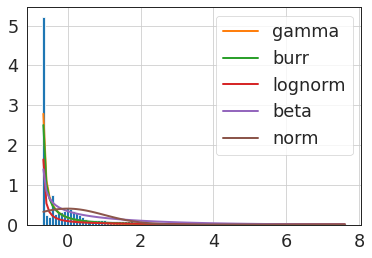

In [ ]:
BL = df["mileage"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure and table, we can see that the normal and burr distributions fit the data the most.

**Power Feature:**

Through looking at the dataset, we noticed that the power feature consists of two main parts which is the power in horses and the number of raotations per minute. So, we will parse those features to two main features which are power_in_horses and RPM. We thought about a possible mathc between the horsepower feature and the RPM. However, the number of missing values in both of them is not mathced. As a result, it would be safer to separate them.

In [ ]:
print("The Missing values of are ", df["power"].isna().sum())

The Missing values of are  29634


**Parsing the power feature**

In [ ]:
import math
from pandas.core.api import notnull
power_in_horses = []
RPM = []
c= 0
for i in range(0, len(df)):
  temp = df.at[i,"power"]
  temp1= ''
  temp2 = ''
  x = type("vgjbh")
  if(type(temp) == x): 
      c+=1
      for cha in temp:
        if(cha == ' '):
          break
        else:
          temp1 +=cha
          #print(temp1)
          #print(cha)
      power_in_horses.append(float(temp1))
      for i in range(len(temp)-5, 0, -1):
      
        if(temp[i] == ' '):
          break
        elif(temp[i] ==','):
            continue
        else:
          temp2 = temp[i]+temp2
      
      RPM.append(float(temp2))
  else:
    power_in_horses.append(float("nan"))
    RPM.append(float("nan"))
print(RPM)
print(df["power"])

[5500.0, 6800.0, 6000.0, 5500.0, 6350.0, 6000.0, 5200.0, 6000.0, 6550.0, 5800.0, 5200.0, 6200.0, 6100.0, 6500.0, 6000.0, nan, 6200.0, 6000.0, 6400.0, 6500.0, 5550.0, 6400.0, 5000.0, 6400.0, 5000.0, 6800.0, 6350.0, 5700.0, 6000.0, 5500.0, 5600.0, 6300.0, 6700.0, 6300.0, 6000.0, 5100.0, 5500.0, nan, 6400.0, 6500.0, nan, nan, nan, 5200.0, 5500.0, nan, 3750.0, 5600.0, 5600.0, 5000.0, 6400.0, 6400.0, 5600.0, 5000.0, 6400.0, 5600.0, 4000.0, 6000.0, 6000.0, 6100.0, 6000.0, 5800.0, 5500.0, 6000.0, 6600.0, 6000.0, nan, nan, 6000.0, 4400.0, 5000.0, 5500.0, 6000.0, 6400.0, 6300.0, nan, 5800.0, 6200.0, nan, 5500.0, nan, 6500.0, nan, 5150.0, 5250.0, 6800.0, 6000.0, 6250.0, nan, 6000.0, 5600.0, 6000.0, nan, 6350.0, 6200.0, 6000.0, 6000.0, 6400.0, 5150.0, 6600.0, 6500.0, 5500.0, 6500.0, nan, 6200.0, 6000.0, 6400.0, 6400.0, 6800.0, 6800.0, 6400.0, 5700.0, nan, 4000.0, 6500.0, 5800.0, 6300.0, 4800.0, 5750.0, 6000.0, 6300.0, 5600.0, 6000.0, 5600.0, 5500.0, 5800.0, nan, 6400.0, 6300.0, 5800.0, 5000.0, 60

In [ ]:
df["power_in_horses"] = power_in_horses
df["RPM"] = RPM
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 72 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   vin                   200000 non-null  object 
 2   back_legroom          200000 non-null  float64
 3   city                  200000 non-null  object 
 4   city_fuel_economy     200000 non-null  float64
 5   daysonmarket          200000 non-null  float64
 6   dealer_zip            200000 non-null  object 
 7   engine_cylinders      194920 non-null  object 
 8   engine_displacement   200000 non-null  float64
 9   engine_type           194920 non-null  object 
 10  exterior_color        199996 non-null  object 
 11  fleet                 108332 non-null  object 
 12  frame_damaged         108332 non-null  object 
 13  franchise_dealer      200000 non-null  bool   
 14  franchise_make        160488 non-null  object 
 15  

**power_in_horses Feature:**

In [ ]:
print("Number of missing values = ", df["power_in_horses"].isna().sum())

Number of missing values =  29634


**Statistics before induction of missing values:**

The mean =  231.35352711221722
The standard deviation =  81.72221493875269
The minimum value = 67.0
The maximum value = 808.0
The median =  208.0
The first quartile =  170.0
The third quartile =  287.0
Distribution of the power_in_horses feature using histogram


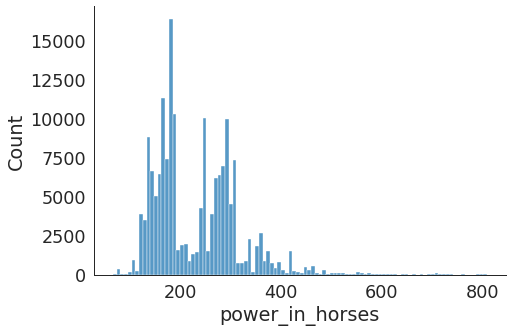

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="power_in_horses", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["power_in_horses"]

print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the power_in_horses feature using histogram")

Distribution of the power_in_horses feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='power_in_horses'>

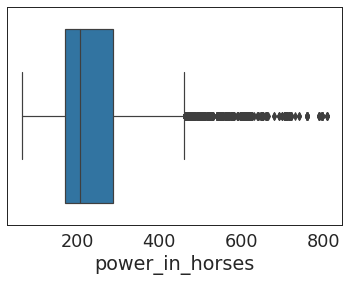

In [ ]:
array = df["power_in_horses"].to_numpy()
#print(array)
print("Distribution of the power_in_horses feature using Box plot")
sns.boxplot(df['power_in_horses'])

We can see that the data contains outliers from the box plot.

Induction of missing values:
We decided to assign the nulll values with the median value over the data set.




In [ ]:
import math
med = df["power_in_horses"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "power_in_horses"])):
 
    
    #model = df.at[i, "model_name"]
    #dft = df[df.model_name == model]
    #print(dft["power_in_horses"].mean())
    df.loc[i,"power_in_horses"] = med

**Statistics after induction of missing values:**

In [ ]:
print("Number of missing values = ", df["power_in_horses"].isna().sum())

Number of missing values =  0


Distribution of the power_in_horses feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='power_in_horses'>

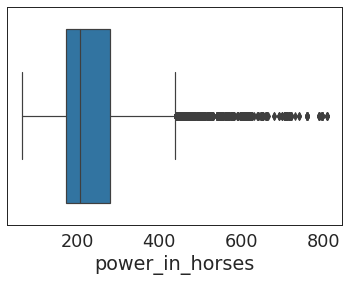

In [ ]:
array = df["power_in_horses"].to_numpy()
#print(array)
print("Distribution of the power_in_horses feature using Box plot")
sns.boxplot(df['power_in_horses'])

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["power_in_horses"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.5339169495549261


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers

In [ ]:
des = df.describe()["power_in_horses"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "power_in_horses"] = (df.loc[i, "power_in_horses"] - m)/std
print(df["power_in_horses"])

0        -0.473025
1         1.082059
2         0.159551
3         0.317695
4         0.726234
            ...   
199995   -1.421890
199996   -0.328060
199997   -1.184674
199998    1.082059
199999   -0.262167
Name: power_in_horses, Length: 200000, dtype: float64


The mean =  -5.584865903074388e-17
The standard deviation =  1.0
The minimum value = -2.1203602447556062
The maximum value = 7.645040652080761
The median =  -0.2621665518353261
The first quartile =  -0.7102416267239043
The third quartile =  0.6866983126346042
Distribution of the power_in_horses feature using histogram


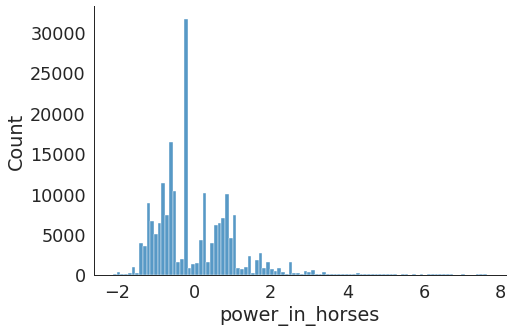

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="power_in_horses", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["power_in_horses"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the power_in_horses feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:30<00:00,  6.19s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm         2.585541   914.659092 -2.251191e+06     inf      0.112786   
beta            2.597412  1030.817927 -2.250263e+06     inf      0.126978   
gamma           2.598467  1038.695560 -2.250194e+06     inf      0.127087   
burr            2.606213   890.102976 -2.249586e+06     inf      0.112166   
norm            2.839691  1745.459988 -2.232451e+06     inf      0.178434   

         ks_pvalue  
lognorm        0.0  
beta           0.0  
gamma          0.0  
burr           0.0  
norm           0.0

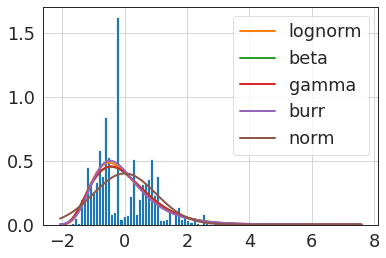

In [ ]:
BL = df["power_in_horses"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that all distributions fit the data 

RPM Feature

In [ ]:
print("Number of missing values = ", df["RPM"].isna().sum())

Number of missing values =  29634


**Statistics before induction of missing values:**

The mean =  5871.4375755725905
The standard deviation =  628.8328157897356
The minimum value = 516.0
The maximum value = 9000.0
The median =  6000.0
The first quartile =  5500.0
The third quartile =  6300.0
Distribution of the RPM feature using histogram


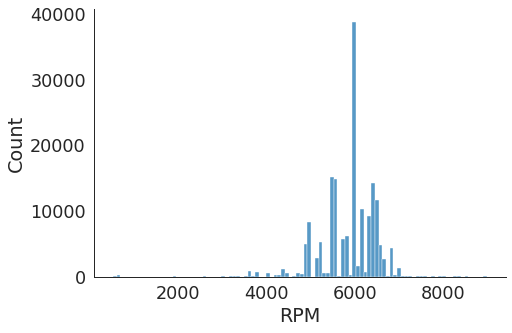

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="RPM", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["RPM"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the RPM feature using histogram")

Distribution of the RPM feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RPM'>

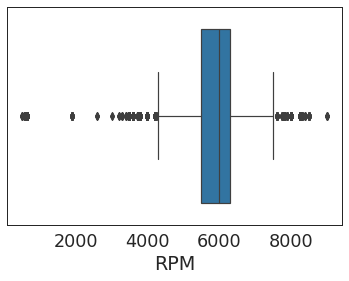

In [ ]:
array = df["RPM"].to_numpy()
#print(array)
print("Distribution of the RPM feature using Box plot")
sns.boxplot(df['RPM'])

We will assign the null values to the average 

In [ ]:
import math
med = df["RPM"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "RPM"])):

    df.loc[i,"RPM"] = med

**Statistics after the induction of missing values:**

In [ ]:
print("Number of missing values = ", df["RPM"].isna().sum())

Number of missing values =  0


Distribution of the RPM feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RPM'>

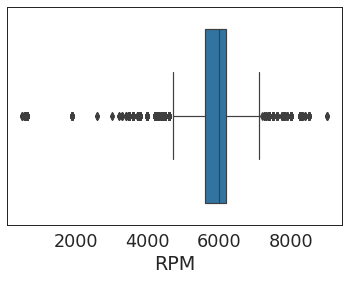

In [ ]:
array = df["RPM"].to_numpy()
#print(array)
print("Distribution of the RPM feature using Box plot")
sns.boxplot(df['RPM'])

From the above plot, we can see that the data contain some outliers

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["RPM"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  -0.07126589565537549


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers.

In [ ]:
des = df.describe()["RPM"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "RPM"] = (df.loc[i, "RPM"] - m)/std
print(df["RPM"])

0        -0.670740
1         1.562273
2         0.188111
3        -0.670740
4         0.789307
            ...   
199995    0.703422
199996    0.188111
199997   -1.701361
199998   -0.670740
199999    0.188111
Name: RPM, Length: 200000, dtype: float64


The mean =  -4.057909563925932e-16
The standard deviation =  1.0
The minimum value = -9.231766478030174
The maximum value = 5.3412172520807415
The median =  0.188111265478579
The first quartile =  -0.4989695327350427
The third quartile =  0.5316516645853898
Distribution of the RPM feature using histogram


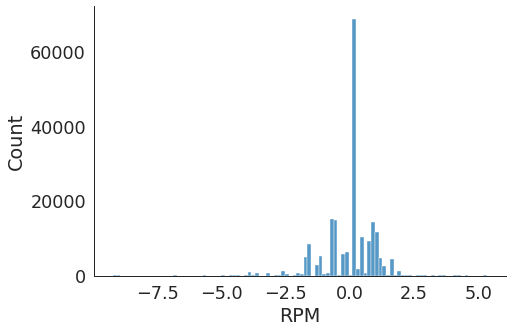

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="RPM", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["RPM"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the RPM feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:34<00:00,  6.85s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
beta            4.680076  2306.800200 -2.132503e+06     inf      0.212317   
lognorm         4.744136  2362.385257 -2.129796e+06     inf      0.218673   
norm            4.749362  2335.795759 -2.129588e+06     inf      0.223380   
gamma           4.826052  2561.008485 -2.126372e+06     inf      0.223528   
burr            6.711041   645.061681 -2.060415e+06     inf      0.438659   

         ks_pvalue  
beta           0.0  
lognorm        0.0  
norm           0.0  
gamma          0.0  
burr           0.0

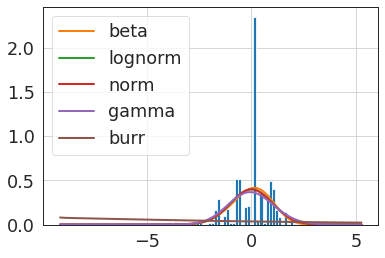

In [ ]:
BL = df["RPM"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that all distributions fit the data except of the gamma distribution

In [ ]:
df= df.drop("power", axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 71 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   vin                   200000 non-null  object 
 2   back_legroom          200000 non-null  float64
 3   city                  200000 non-null  object 
 4   city_fuel_economy     200000 non-null  float64
 5   daysonmarket          200000 non-null  float64
 6   dealer_zip            200000 non-null  object 
 7   engine_cylinders      194920 non-null  object 
 8   engine_displacement   200000 non-null  float64
 9   engine_type           194920 non-null  object 
 10  exterior_color        199996 non-null  object 
 11  fleet                 108332 non-null  object 
 12  frame_damaged         108332 non-null  object 
 13  franchise_dealer      200000 non-null  bool   
 14  franchise_make        160488 non-null  object 
 15  

**The Torque Feature**

The torque feature consists of two features which are the torque in Ib-Ft and the RPM. We will do with them the exact thing we did with the power feature as will parse it in two features and then analyze each feature on its own.

In [ ]:
import math
from pandas.core.api import notnull
torque_ib_ft = []
torque_RPM = []
c= 0
for i in range(0, len(df)):
  temp = df.at[i,"torque"]
  temp1= ''
  temp2 = ''
  x = type("vgjbh")
  if(type(temp) == x): 
      c+=1
      for cha in temp:
        if(cha == ' '):
          break
        else:
          temp1 +=cha
          #print(temp1)
          #print(cha)
      torque_ib_ft.append(float(temp1))
      for i in range(len(temp)-5, 0, -1):
      
        if(temp[i] == ' '):
          break
        elif(temp[i] ==','):
            continue
        else:
          temp2 = temp[i]+temp2
      
      torque_RPM.append(float(temp2))
  else:
    torque_ib_ft.append(float("nan"))
    torque_RPM.append(float("nan"))
print(torque_RPM)
print(df["torque"])

[1500.0, 2800.0, 4500.0, 2000.0, 4400.0, 4000.0, 1450.0, 5200.0, 4300.0, 4000.0, 4000.0, 4700.0, 4000.0, 4700.0, 4000.0, nan, 4500.0, 4400.0, 4800.0, 4400.0, 1300.0, 3900.0, 2500.0, 4000.0, 2500.0, 5300.0, 4800.0, 2200.0, 4000.0, nan, 2000.0, 4500.0, 4900.0, 4700.0, 4400.0, 3600.0, nan, nan, 3900.0, 4400.0, nan, nan, nan, nan, 1500.0, nan, 1500.0, 2000.0, 1500.0, 1600.0, 3900.0, 3900.0, 4100.0, 1400.0, 4000.0, 3900.0, 1750.0, 4100.0, 4320.0, 1800.0, 4000.0, 4100.0, 1500.0, 4000.0, 4400.0, 4320.0, nan, nan, 4400.0, 1600.0, 1450.0, 3000.0, 4400.0, 4800.0, 4250.0, nan, 1800.0, 4500.0, nan, 1800.0, nan, 4450.0, nan, 4250.0, 3000.0, 2800.0, 4700.0, 5000.0, nan, 4700.0, 4100.0, 4000.0, nan, 4400.0, 4000.0, 4400.0, 4400.0, 4400.0, 4250.0, 4700.0, 4000.0, 1250.0, 4400.0, nan, 4700.0, 4700.0, 4000.0, 3900.0, 3600.0, 2800.0, 4000.0, 4800.0, nan, 1750.0, 4400.0, 4000.0, 4000.0, 1500.0, 1900.0, 4000.0, 4000.0, 2000.0, 4250.0, 2000.0, 3000.0, 3500.0, nan, 4400.0, 4700.0, 4400.0, 2500.0, 4000.0, 440

In [ ]:
df["torque_ib_ft"] = torque_ib_ft
df["torque_RPM"] = torque_RPM
df= df.drop("torque", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 72 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   vin                   200000 non-null  object 
 2   back_legroom          200000 non-null  float64
 3   city                  200000 non-null  object 
 4   city_fuel_economy     200000 non-null  float64
 5   daysonmarket          200000 non-null  float64
 6   dealer_zip            200000 non-null  object 
 7   engine_cylinders      194920 non-null  object 
 8   engine_displacement   200000 non-null  float64
 9   engine_type           194920 non-null  object 
 10  exterior_color        199996 non-null  object 
 11  fleet                 108332 non-null  object 
 12  frame_damaged         108332 non-null  object 
 13  franchise_dealer      200000 non-null  bool   
 14  franchise_make        160488 non-null  object 
 15  

**torque_ib_ft feature:**


In [ ]:
print("Number of missing values = ", df["torque_ib_ft"].isna().sum())

Number of missing values =  32563


Statistics before induction of missing values

The mean =  233.4288478651672
The standard deviation =  86.42130861835923
The minimum value = 68.0
The maximum value = 811.0
The median =  236.0
The first quartile =  175.0
The third quartile =  270.0
Distribution of the torque_ib_ftfeature using histogram


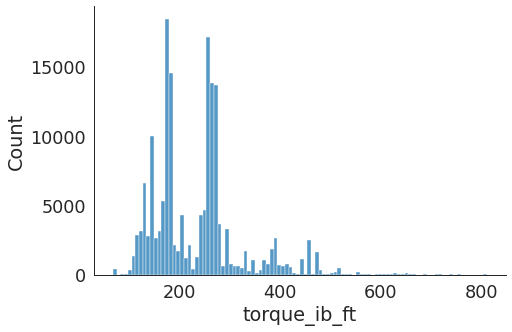

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="torque_ib_ft", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["torque_ib_ft"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the torque_ib_ftfeature using histogram")

Distribution of the front legroom feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='torque_ib_ft'>

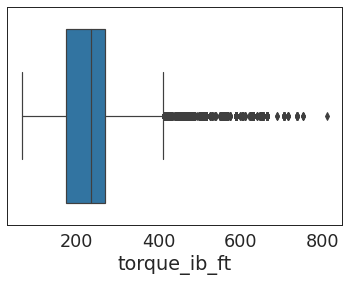

In [ ]:
array = df["torque_ib_ft"].to_numpy()
#print(array)
print("Distribution of the front legroom feature using Box plot")
sns.boxplot(df['torque_ib_ft'])

**Induction of Missing values:**

We will assign the null values to the median of the data set

In [ ]:
import math
med = df["torque_ib_ft"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "torque_ib_ft"])):

    df.loc[i,"torque_ib_ft"] = med

**Statistcs after induction of missing values:**

In [ ]:
print("Number of missing values = ", df["torque_ib_ft"].isna().sum())

Number of missing values =  0


Distribution of the torque_ib_ft feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='torque_ib_ft'>

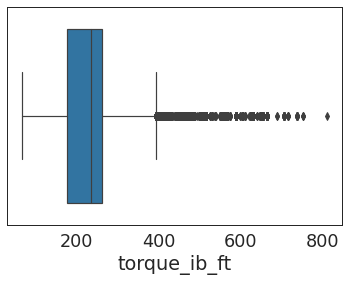

In [ ]:
array = df["torque_ib_ft"].to_numpy()
#print(array)
print("Distribution of the torque_ib_ft feature using Box plot")
sns.boxplot(df['torque_ib_ft'])

From the above figure, we can see that the data contains many outliers

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["torque_ib_ft"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.5495974613606663


In [ ]:
des = df.describe()["torque_ib_ft"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "torque_ib_ft"] = (df.loc[i, "torque_ib_ft"] - m)/std
print(df["torque_ib_ft"])

0        -0.529184
1         0.406586
2         0.330713
3         0.330713
4         0.330713
            ...   
199995   -1.540827
199996   -0.630348
199997   -1.085588
199998    1.152673
199999    0.027220
Name: torque_ib_ft, Length: 200000, dtype: float64


The mean =  1.659827830735594e-16
The standard deviation =  0.9999999999999998
The minimum value = -2.0972307288440435
The maximum value = 7.298405101664101
The median =  0.027219903087811328
The first quartile =  -0.7315124654592797
The third quartile =  0.3686494689340023
Distribution of the torque_ib_ft feature using histogram


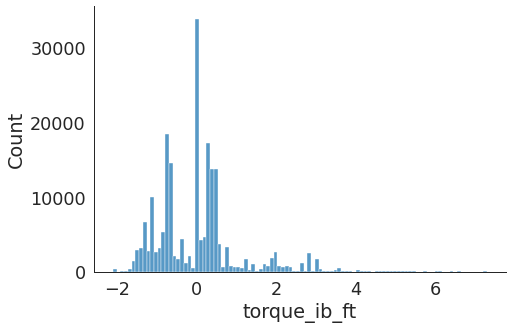

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="torque_ib_ft", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["torque_ib_ft"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the torque_ib_ft feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:14<00:00,  2.81s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
gamma           4.190396   979.350726 -2.154619e+06     inf      0.150903   
lognorm         4.209489   895.642627 -2.153710e+06     inf      0.160813   
norm            4.258529  1599.675845 -2.151405e+06     inf      0.153428   
burr            6.236438   716.394907 -2.075084e+06     inf      0.383264   
beta           41.254982          inf -1.697211e+06     inf      0.999575   

         ks_pvalue  
gamma          0.0  
lognorm        0.0  
norm           0.0  
burr           0.0  
beta           0.0

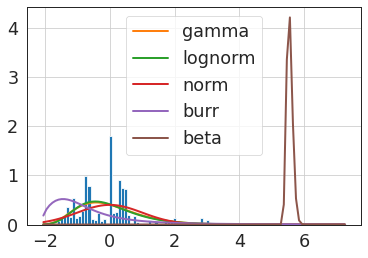

In [ ]:
BL = df["torque_ib_ft"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From this figure, we can see that any type of distributions fits this data

**torque_RPM Feature**

In [ ]:
print("Number of missing values = ", df["torque_RPM"].isna().sum())

Number of missing values =  32563


**Statistics before induction of missing values:**

The mean =  3476.3118904423754
The standard deviation =  1296.3240677107356
The minimum value = 200.0
The maximum value = 7500.0
The median =  4000.0
The first quartile =  2200.0
The third quartile =  4400.0
Distribution of the torque_RPM feature using histogram


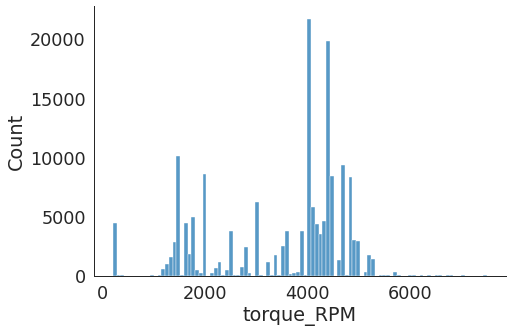

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="torque_RPM", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["torque_RPM"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the torque_RPM feature using histogram")

Distribution of the torque_RPM feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='torque_RPM'>

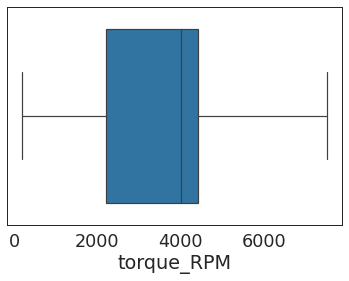

In [ ]:
array = df["torque_RPM"].to_numpy()
#print(array)
print("Distribution of the torque_RPM feature using Box plot")
sns.boxplot(df['torque_RPM'])

**Induction of missing values**

We will assign the null values to the median 

In [ ]:
import math
med = df["torque_RPM"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "torque_RPM"])):

    df.loc[i,"torque_RPM"] = med

**Statistics after the induction of missing values:**

In [ ]:
print("Number of missing values = ", df["torque_RPM"].isna().sum())

Number of missing values =  0


Distribution of the front legroom feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='torque_RPM'>

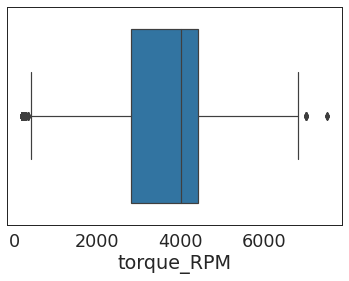

In [ ]:
array = df["torque_RPM"].to_numpy()
#print(array)
print("Distribution of the front legroom feature using Box plot")
sns.boxplot(df['torque_RPM'])

From the above plot, we can see that the data contain some outliers

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["torque_RPM"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  -0.1446687174049601


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers.

In [ ]:
des = df.describe()["torque_RPM"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "torque_RPM"] = (df.loc[i, "torque_RPM"] - m)/std
print(df["torque_RPM"])

0        -1.715460
1        -0.633716
2         0.780873
3        -1.299405
4         0.697662
            ...   
199995    0.780873
199996    1.196928
199997   -2.797205
199998   -0.550505
199999    0.364817
Name: torque_RPM, Length: 200000, dtype: float64


The mean =  1.4193091146808e-16
The standard deviation =  0.9999999999999998
The minimum value = -2.797204852503653
The maximum value = 3.2772061947631017
The median =  0.3648173364845209
The first quartile =  -0.6337159863538497
The third quartile =  0.6976617774306444
Distribution of the torque_RPM feature using histogram


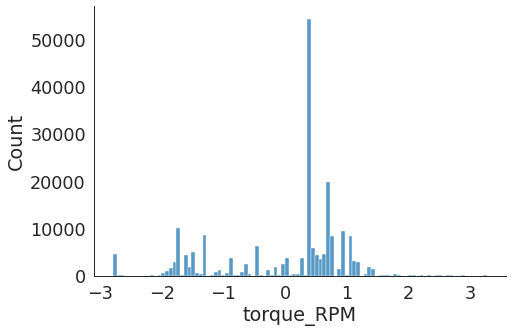

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="torque_RPM", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["torque_RPM"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the torque_RPM feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:35<00:00,  7.13s/it]


sumsquare_error         aic           bic  kl_div  ks_statistic  \
burr           21.003583  571.574249 -1.832227e+06     inf      0.226787   
beta           21.947345  766.245452 -1.823436e+06     inf      0.265585   
norm           22.661447  501.005303 -1.817057e+06     inf      0.289636   
lognorm        22.665173  501.314089 -1.817012e+06     inf      0.289004   
gamma          22.855758  487.985891 -1.815337e+06     inf      0.296095   

         ks_pvalue  
burr           0.0  
beta           0.0  
norm           0.0  
lognorm        0.0  
gamma          0.0

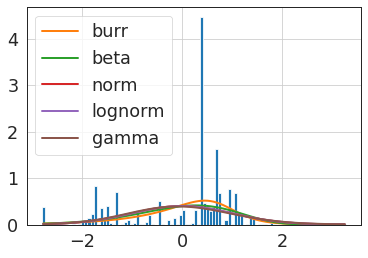

In [ ]:
BL = df["torque_RPM"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that all distributions fit the data 

**Seller Rating feature:**

In [ ]:
print("Number of missing values = ", df["seller_rating"].isna().sum())

Number of missing values =  2706


**Statistics before induction of missing values:**

The mean =  4.267410953758598
The standard deviation =  0.518063361681702
The minimum value = 1.0
The maximum value = 5.0
The median =  4.342857143
The first quartile =  4.0
The third quartile =  4.6
Distribution of the seller_rating feature using histogram


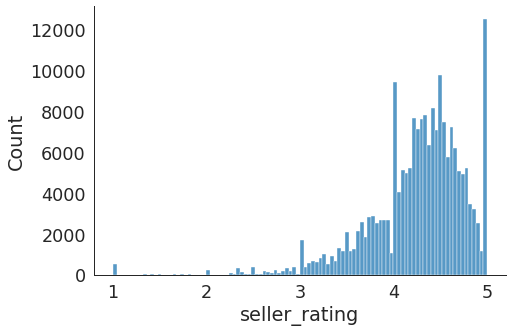

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="seller_rating", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["seller_rating"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the seller_rating feature using histogram")

Distribution of the seller_rating feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seller_rating'>

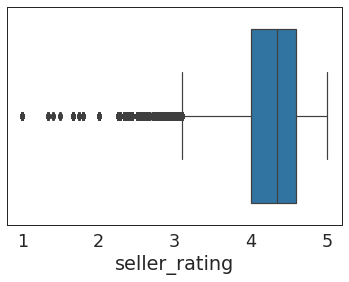

In [ ]:
array = df["seller_rating"].to_numpy()
#print(array)
print("Distribution of the seller_rating feature using Box plot")
sns.boxplot(df['seller_rating'])

**Induction of missing values**

We will assign the null values to the median 

In [ ]:
import math
med = df["seller_rating"].median()
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "seller_rating"])):

    df.loc[i,"seller_rating"] = med

**Statistics after the induction of missing values:**

Distribution of the seller_rating feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seller_rating'>

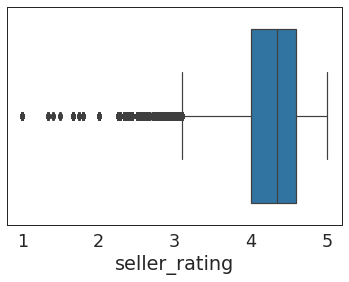

In [ ]:
array = df["seller_rating"].to_numpy()
#print(array)
print("Distribution of the seller_rating feature using Box plot")
sns.boxplot(df['seller_rating'])

From the above plot, we can see that the data contain some outliers

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["seller_rating"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.07939113305188357


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers.

In [ ]:
des = df.describe()["seller_rating"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "seller_rating"] = (df.loc[i, "seller_rating"] - m)/std
print(df["seller_rating"])

0         0.964350
1        -0.050537
2        -0.660410
3         0.172382
4        -1.618567
            ...   
199995    0.049912
199996    1.211495
199997    0.507131
199998    0.085633
199999    0.061343
Name: seller_rating, Length: 200000, dtype: float64


The mean =  1.561524243243184e-15
The standard deviation =  1.0
The minimum value = -6.351149152870507
The maximum value = 1.4215683541650332
The median =  0.14462190685821966
The first quartile =  -0.521611022593852
The third quartile =  0.6442966034614784
Distribution of the seller_rating feature using histogram


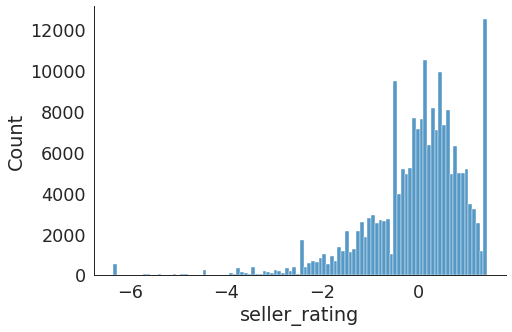

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="seller_rating", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["seller_rating"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the seller_rating feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:36<00:00,  7.27s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
beta            0.835007   787.150982 -2.477229e+06     inf      0.051196   
burr            0.851583   844.776613 -2.473297e+06     inf      0.090542   
norm            0.996010  1298.721065 -2.441990e+06     inf      0.092201   
lognorm         1.000427  1314.044680 -2.441093e+06     inf      0.093314   
gamma           1.099732  1328.244498 -2.422165e+06     inf      0.110372   

         ks_pvalue  
beta           0.0  
burr           0.0  
norm           0.0  
lognorm        0.0  
gamma          0.0

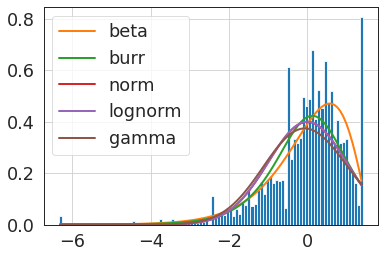

In [ ]:
BL = df["seller_rating"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that all distributions fit the data except of the gamma distribution

City Feature

First, number of unique values and number of vehicles for different cities:

In [ ]:
print("Number of unique values = " , len(df["city"].unique()))
print("Number of cars for different cities: ")
ex = df["city"].value_counts().keys()
print(list(ex))

Number of unique values =  4188
Number of cars for different cities: 
['Houston', 'San Antonio', 'Miami', 'Columbus', 'Las Vegas', 'Jacksonville', 'Phoenix', 'Tampa', 'Orlando', 'Dallas', 'Austin', 'Indianapolis', 'Cincinnati', 'Columbia', 'Tucson', 'Raleigh', 'Charlotte', 'Springfield', 'Denver', 'San Jose', 'Stafford', 'Chicago', 'Louisville', 'Oklahoma City', 'Scottsdale', 'Arlington', 'El Paso', 'Madison', 'Albuquerque', 'Memphis', 'Colorado Springs', 'Richmond', 'Greenville', 'Sacramento', 'San Diego', 'Rochester', 'West Palm Beach', 'Minneapolis', 'Saint Louis', 'Kansas City', 'Peoria', 'Marietta', 'Salt Lake City', 'Los Angeles', 'Omaha', 'Milwaukee', 'Roseville', 'Alexandria', 'Englewood', 'Lexington', 'Mesa', 'Concord', 'Lafayette', 'Plano', 'Henderson', 'Pittsburgh', 'Fort Worth', 'Birmingham', 'Tulsa', 'Aurora', 'Duluth', 'Fremont', 'Virginia Beach', 'Wichita', 'Bloomington', 'Baton Rouge', 'Atlanta', 'Clarksville', 'Auburn', 'Littleton', 'Glendale', 'Pensacola', 'Fort Myers

In [ ]:
lis = []
for i in range(0, 100):
  lis.append(ex[i])

In [ ]:
print(lis)

['Houston', 'San Antonio', 'Miami', 'Columbus', 'Las Vegas', 'Jacksonville', 'Phoenix', 'Tampa', 'Orlando', 'Dallas', 'Austin', 'Indianapolis', 'Cincinnati', 'Columbia', 'Tucson', 'Raleigh', 'Charlotte', 'Springfield', 'Denver', 'San Jose', 'Stafford', 'Chicago', 'Louisville', 'Oklahoma City', 'Scottsdale', 'Arlington', 'El Paso', 'Madison', 'Albuquerque', 'Memphis', 'Colorado Springs', 'Richmond', 'Greenville', 'Sacramento', 'San Diego', 'Rochester', 'West Palm Beach', 'Minneapolis', 'Saint Louis', 'Kansas City', 'Peoria', 'Marietta', 'Salt Lake City', 'Los Angeles', 'Omaha', 'Milwaukee', 'Roseville', 'Alexandria', 'Englewood', 'Lexington', 'Mesa', 'Concord', 'Lafayette', 'Plano', 'Henderson', 'Pittsburgh', 'Fort Worth', 'Birmingham', 'Tulsa', 'Aurora', 'Duluth', 'Fremont', 'Virginia Beach', 'Wichita', 'Bloomington', 'Baton Rouge', 'Atlanta', 'Clarksville', 'Auburn', 'Littleton', 'Glendale', 'Pensacola', 'Fort Myers', 'Franklin', 'Wilmington', 'Fort Lauderdale', 'Ontario', 'Manchester

Second, Number of missing values:

In [ ]:
print("Number of missing values = ", df["city"].isna().sum())

Number of missing values =  0


**Converting cities from categorical to numerical data using one hot encoding.**
Because of the huge number of cities, we will include only the top 100 cities and the other cities will fall under others category


In [ ]:
new_cols = {}
for city in lis :
  new_cols[city] = []
new_cols["others"]= []
print(new_cols)
for i in range(0, len(df)):
  target_col =df.at[i,"city"]
  if(target_col in lis):
    new_cols["others"].append(0)
    for city in lis:
      if city == target_col:
        new_cols[city].append(1)
      else:
        new_cols[city].append(0)
  else:
    new_cols["others"].append(1)
    for city in lis:
        new_cols[city].append(0)

{'Houston': [], 'San Antonio': [], 'Miami': [], 'Columbus': [], 'Las Vegas': [], 'Jacksonville': [], 'Phoenix': [], 'Tampa': [], 'Orlando': [], 'Dallas': [], 'Austin': [], 'Indianapolis': [], 'Cincinnati': [], 'Columbia': [], 'Tucson': [], 'Raleigh': [], 'Charlotte': [], 'Springfield': [], 'Denver': [], 'San Jose': [], 'Stafford': [], 'Chicago': [], 'Louisville': [], 'Oklahoma City': [], 'Scottsdale': [], 'Arlington': [], 'El Paso': [], 'Madison': [], 'Albuquerque': [], 'Memphis': [], 'Colorado Springs': [], 'Richmond': [], 'Greenville': [], 'Sacramento': [], 'San Diego': [], 'Rochester': [], 'West Palm Beach': [], 'Minneapolis': [], 'Saint Louis': [], 'Kansas City': [], 'Peoria': [], 'Marietta': [], 'Salt Lake City': [], 'Los Angeles': [], 'Omaha': [], 'Milwaukee': [], 'Roseville': [], 'Alexandria': [], 'Englewood': [], 'Lexington': [], 'Mesa': [], 'Concord': [], 'Lafayette': [], 'Plano': [], 'Henderson': [], 'Pittsburgh': [], 'Fort Worth': [], 'Birmingham': [], 'Tulsa': [], 'Aurora':

In [ ]:
import sys
sys.getsizeof(new_cols)


4696

In [ ]:
for i in range(0,100) :
  df[lis[i]] = new_cols[lis[i]]
df["others"] = new_cols["others"]

<ipython-input-234-97b4109abc23>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[lis[i]] = new_cols[lis[i]]
<ipython-input-234-97b4109abc23>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["others"] = new_cols["others"]


In [ ]:
df.keys()

Index(['Unnamed: 0', 'vin', 'back_legroom', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_cylinders', 'engine_displacement',
       'engine_type',
       ...
       'Cleveland', 'Reno', 'Van Nuys', 'Nashville', 'Spring', 'Woodbridge',
       'Savannah', 'Tempe', 'Bradenton', 'others'],
      dtype='object', length=173)

The city feature has a great semantic importance and relevance since prices can change from a city to a city. Also, different types of cars might have different importance according to the cities they belong to.

**Fleet Feature:** 
This feature describes whether the car has been a part of a fleet before or not. 

In [ ]:
print("Number of unique values = " , len(df["fleet"].unique()))
print("Number of cars for different fleet: ")
df["fleet"].value_counts()

Number of unique values =  3
Number of cars for different fleet: 


False    83535
True     24797
Name: fleet, dtype: int64

In [ ]:
print("Number of missing values = ", df["fleet"].isna().sum())

Number of missing values =  91668


**Converting fleet feature from categorical to numerical data using one hot encoding.** ِ

In [ ]:
lis = df["fleet"].unique()
print(lis)
lis2=[]
for val in lis:
  lis2.append(  "fleet "+str(val))
print(lis2)
new_cols = {}
for val in lis2:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"fleet"]
  
  if(target_col == True):
      new_cols['fleet True'].append(1)
      new_cols['fleet False'].append(0)
      new_cols['fleet nan'].append(0)
  elif (target_col == False):
      new_cols['fleet True'].append(0)
      new_cols['fleet False'].append(1)
      new_cols['fleet nan'].append(0)
  else:
      new_cols['fleet True'].append(0)
      new_cols['fleet False'].append(0)
      new_cols['fleet nan'].append(1)

[nan False True]
['fleet nan', 'fleet False', 'fleet True']


In [ ]:
print(new_cols.keys())

dict_keys(['fleet nan', 'fleet False', 'fleet True'])


In [ ]:
for val in lis2:
  df[val] = new_cols[val]

<ipython-input-240-9358f190476c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[val] = new_cols[val]


In [ ]:
print(df.keys())

Index(['Unnamed: 0', 'vin', 'back_legroom', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_cylinders', 'engine_displacement',
       'engine_type',
       ...
       'Nashville', 'Spring', 'Woodbridge', 'Savannah', 'Tempe', 'Bradenton',
       'others', 'fleet nan', 'fleet False', 'fleet True'],
      dtype='object', length=176)


**Engine Type and Engine Cylinders Features**

In [ ]:
print(df["engine_type"].equals(df["engine_cylinders"]))

True


Since, the two columns are duplicates, we will remove one of them and work with the other one. We decided to remove the engine cylinders feature

In [ ]:
df= df.drop("engine_cylinders", axis = 1)

Engine Type feature


First, number of unique values and number of vehicles for different body types:

In [ ]:
print("Number of unique values = " , len(df["engine_type"].unique()))
print("Number of cars for different engine types: ")
df["engine_type"].value_counts()

Number of unique values =  30
Number of cars for different engine types: 


I4                           111391
V6                            48606
V8                             9600
I4 Hybrid                      5853
H4                             5307
I3                             4561
V6 Flex Fuel Vehicle           3080
I6                             2327
V8 Flex Fuel Vehicle           1308
I4 Flex Fuel Vehicle            780
I4 Diesel                       542
H6                              368
I5                              346
V6 Hybrid                       236
V6 Diesel                       226
V12                             110
V10                              76
I2                               63
W12                              47
I6 Diesel                        39
V8 Hybrid                        10
H4 Hybrid                        10
V8 Diesel                         9
W12 Flex Fuel Vehicle             9
R2                                6
I4 Compressed Natural Gas         4
I6 Hybrid                         3
I5 Diesel                   

**Converting engine types from categorical to numerical data using one hot encoding.**

In [ ]:
new_cols = {}
lis = df["engine_type"].unique()
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"engine_type"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)

In [ ]:
for val in lis:
  df[val] = new_cols[val]

In [ ]:
df = df.drop("engine_type", axis = 1)

**Exterior color and listing color features**

In [ ]:
print("Number of unique values of the exterior color feature = ", len(df["exterior_color"].unique()))

Number of unique values of the exterior color feature =  7774


The is a huge number of colors that will increase the dimensionality of our data hugely. However, from the description of the data set we found that the listing color is a feature describing the color group of the exterior color of the car. As a result, we decided to remove the exterior color feature and include the listing color feature

**Listing color Feature**

In [ ]:
print("Number of missing values = ", df["listing_color"].isna().sum())

Number of missing values =  0


In [ ]:
print("Number of unique values = " , len(df["listing_color"].unique()))
print("Number of cars for different colors: ")
df["listing_color"].value_counts()

Number of unique values =  15
Number of cars for different colors: 


WHITE      39838
BLACK      39566
UNKNOWN    27667
SILVER     26971
GRAY       26865
BLUE       17094
RED        16197
GREEN       1758
BROWN       1519
ORANGE       867
GOLD         823
TEAL         427
YELLOW       293
PURPLE        99
PINK          16
Name: listing_color, dtype: int64

Cars colors have an effect on the price of the car as some colors may have higher demand than other cars as a result the car color have huge semantic importance and relevance

**Converting car exterior colors from categorical to numerical data using one hot encoding.**

In [ ]:
lis = df["listing_color"].unique()
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"listing_color"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)

In [ ]:
for val in lis:
  df[val] = new_cols[val]

In [ ]:
df = df.drop("listing_color", axis = 1)

**Franchise Dealer Feature:**

In [ ]:
print("Number of unique values = " , len(df["franchise_dealer"].unique()))
print("Number of cars for different body types: ")
df["franchise_dealer"].value_counts()

Number of unique values =  2
Number of cars for different body types: 


True     160719
False     39281
Name: franchise_dealer, dtype: int64

In [ ]:
print("Number of missing values = ", df["franchise_dealer"].isna().sum())

Number of missing values =  0


Since there is no missing values and the category is boolean, the category is now ready and does not require any preprocessing.

**Car Make Name feature:**

In [ ]:
print("Number of unique values = " , len(df["make_name"].unique()))
print("Number of cars for different make names: ")
df["make_name"].value_counts()

Number of unique values =  68
Number of cars for different make names: 


Ford           22524
Chevrolet      21558
Toyota         17387
Honda          17058
Nissan         16101
               ...  
SRT                1
Clenet             1
Willys             1
Triumph            1
Pininfarina        1
Name: make_name, Length: 68, dtype: int64

In [ ]:
print("Number of missing values = ", df["make_name"].isna().sum())

Number of missing values =  0



**Converting make names from categorical to numerical data using one hot encoding.**

In [ ]:
lis = df["make_name"].unique()
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"make_name"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)


In [ ]:
for val in lis:
  df[val] = new_cols[val]

In [ ]:
df= df.drop("make_name", axis = 1)

**Car Model Feature**

In [ ]:
print("Number of unique values = " , len(df["model_name"].unique()))
print("Number of cars for different models: ")
df["model_name"].value_counts()

Number of unique values =  907
Number of cars for different models: 


Equinox           5296
Escape            4644
Explorer          4012
Rogue             3870
Grand Cherokee    3719
                  ... 
TR6                  1
348                  1
57                   1
F8 Tributo           1
Revero               1
Name: model_name, Length: 907, dtype: int64

In [ ]:
print("Number of missing values = ", df["model_name"].isna().sum())

Number of missing values =  0


**Converting model names from categorical to numerical data using one hot encoding.**

In [ ]:
lis = df["model_name"].unique()
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"model_name"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)

In [ ]:
for val in lis:
  df[val] = new_cols[val]

<ipython-input-264-c02d18691c09>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[val] = new_cols[val]


In [ ]:
df = df.drop("model_name", axis = 1)

**Franchise Make Feature**

In [ ]:
print("Number of unique values = " , len(df["franchise_make"].unique()))
print("Number of cars for different franchise makes: ")
df["franchise_make"].value_counts()

Number of unique values =  47
Number of cars for different franchise makes: 


Chevrolet        20182
Ford             19011
Honda            14511
Toyota           13844
Jeep             12430
Nissan           11073
Hyundai           8393
Kia               7070
Buick             5545
Volkswagen        4897
Subaru            4776
Dodge             3957
Mazda             3600
BMW               3576
Mercedes-Benz     3368
GMC               2841
Cadillac          2753
Lexus             2337
Audi              2153
Lincoln           2087
Acura             2045
Chrysler          1630
Volvo             1529
Mitsubishi        1514
INFINITI          1410
Land Rover         995
Porsche            910
MINI               433
Jaguar             392
FIAT               296
Scion              293
Maserati           199
Alfa Romeo         136
Genesis             79
Bentley             46
Ferrari             37
Rolls-Royce         32
Lotus               32
McLaren             30
Aston Martin        27
Lamborghini          8
smart                4
Shelby               3
Rover      

In [ ]:
print("Number of missing values = ", df["franchise_make"].isna().sum())

Number of missing values =  39512


**Converting Franchise Makes from categorical to numerical data using one hot encoding.**

In [ ]:
lis = df["franchise_make"].unique()
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"franchise_make"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)

In [ ]:
for val in lis:
  df[val] = new_cols[val]

In [ ]:
df.drop("franchise_make", axis = 1, inplace = True)

**Transmission Feature**

In [ ]:
print("Number of unique values = " , len(df["transmission"].unique()))
print("Number of cars for different transmision types: ")
df["transmission"].value_counts()

Number of unique values =  5
Number of cars for different transmision types: 


A              154348
CVT             36925
M                3634
Dual Clutch       895
Name: transmission, dtype: int64

In [ ]:
print("Number of missing values = ", df["transmission"].isna().sum())

Number of missing values =  4198


**Converting Transmission types from categorical to numerical data using one hot encoding.**

In [ ]:
lis = df["transmission"].unique()
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"transmission"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)

In [ ]:
for val in lis:
  df[val] = new_cols[val]

In [ ]:
df.drop("transmission", axis = 1, inplace = True)

**`Transmission Display Feature`**

In [ ]:
print("Number of unique values = " , len(df["transmission_display"].unique()))
print("Number of cars for transmission_display types: ")
df["transmission_display"].value_counts()

Number of unique values =  37
Number of cars for transmission_display types: 


Automatic                             77251
Continuously Variable Transmission    36674
6-Speed Automatic                     28797
8-Speed Automatic                     20133
9-Speed Automatic                     11243
6-Speed Automatic Overdrive            5271
7-Speed Automatic                      3219
5-Speed Automatic                      2791
4-Speed Automatic                      2483
6-Speed Manual                         1591
Manual                                 1292
5-Speed Automatic Overdrive             749
8-Speed Automatic Overdrive             740
1-Speed Automatic                       679
5-Speed Manual                          565
6-Speed Dual Clutch                     503
4-Speed Automatic Overdrive             436
9-Speed Automatic Overdrive             323
8-Speed Dual Clutch                     227
7-Speed Automatic Overdrive             158
7-Speed CVT                             157
7-Speed Dual Clutch                     146
5-Speed Manual Overdrive        

In [ ]:
print("Number of missing values = ", df["transmission_display"].isna().sum())

Number of missing values =  4198


**Converting Transmission display types from categorical to numerical data using one hot encoding.**

In [ ]:
lis = df["transmission_display"].unique()
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"transmission_display"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)

In [ ]:
for val in lis:
  df[val] = new_cols[val]

In [ ]:
df.drop("transmission_display", axis = 1, inplace = True)

***wheel_system feature***

In [ ]:
print("Number of unique values = " , len(df["wheel_system"].unique()))
print("Number of cars for wheel_system types: ")
df["wheel_system"].value_counts()

Number of unique values =  6
Number of cars for wheel_system types: 


FWD    101039
AWD     56082
4WD     20260
RWD     13093
4X2      2666
Name: wheel_system, dtype: int64

In [ ]:
print("Number of missing values = ", df["wheel_system"].isna().sum())

Number of missing values =  6860


In [ ]:
lis = df["wheel_system"].unique()
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"wheel_system"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)

In [ ]:
for val in lis:
  df[val] = new_cols[val]

In [ ]:
df.drop("wheel_system", axis = 1, inplace = True)

***wheel_system_display feature*** 

In [ ]:
print("Number of unique values = " , len(df["wheel_system_display"].unique()))
print("Number of cars for wheel_system_display types: ")
df["wheel_system_display"].value_counts()

Number of unique values =  6
Number of cars for wheel_system_display types: 


Front-Wheel Drive    101039
All-Wheel Drive       56082
Four-Wheel Drive      20260
Rear-Wheel Drive      13093
4X2                    2666
Name: wheel_system_display, dtype: int64

In [ ]:
print("Number of missing values = ", df["wheel_system_display"].isna().sum())

Number of missing values =  6860


In [ ]:
lis = df["wheel_system_display"].unique()
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"wheel_system_display"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)

In [ ]:
for val in lis:
  df[val] = new_cols[val]

In [ ]:
df.drop("wheel_system_display", axis = 1, inplace = True)

**Model year Category:**


This category could be hadled as numerical feature or a categorical feature. We chose to use it as a numerical feature.

In [ ]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("Number of missing values = ", df["year"].isna().sum())

Number of missing values =  0


Since, there is no missing data we will compute statistics directly.




Distribution of the year feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

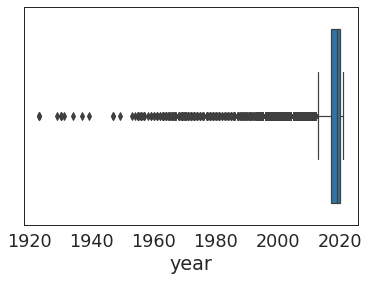

In [ ]:
array = df["year"].to_numpy()
#print(array)
print("Distribution of the year feature using Box plot")
sns.boxplot(df['year'])

We can see that the data contains outliers from the box plot.





In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["year"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.36426984789184946


The final step in dealing with the data is to scale it. We will use Satndard z scaling to help us deal with outliers

In [ ]:
des = df.describe()["year"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "year"] = (df.loc[i, "year"] - m)/std
print(df["year"])

0         0.566047
1         0.566047
2        -1.890705
3         0.566047
4         0.320371
            ...   
199995    0.566047
199996    0.320371
199997    0.566047
199998   -0.908004
199999    0.811722
Name: year, Length: 200000, dtype: float64


The mean =  2.146518518486573e-14
The standard deviation =  1.0
The minimum value = -23.26444287903454
The maximum value = 0.8117217485399644
The median =  0.3203714500180357
The first quartile =  -0.17097884850389297
The third quartile =  0.566046599279
Distribution of the year feature using histogram


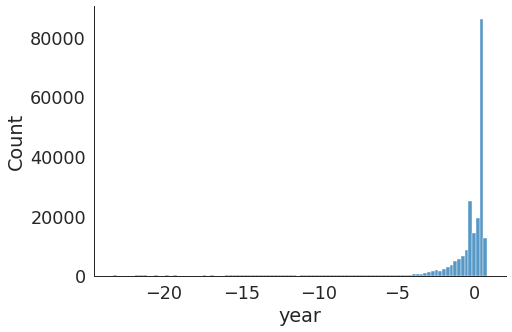

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="year", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["year"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the year feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:58<00:00, 11.72s/it]


sumsquare_error           aic           bic  kl_div  ks_statistic  \
lognorm         2.139566  17855.350949 -2.289057e+06     inf      0.224593   
norm            2.142870  17621.022669 -2.288761e+06     inf      0.222801   
beta            2.563025   1519.709031 -2.252928e+06     inf      0.466819   
burr            2.823044   7729.478114 -2.233603e+06     inf      0.459829   
gamma           3.818893    783.763336 -2.173186e+06     inf      0.492882   

         ks_pvalue  
lognorm        0.0  
norm           0.0  
beta           0.0  
burr           0.0  
gamma          0.0

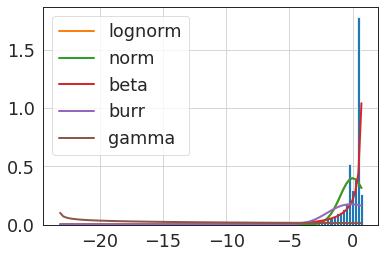

In [ ]:
BL = df["year"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that the normal distribution fits the data the most

**Savings Amount Feature:**

In [ ]:
print("Number of missing values = ", df["savings_amount"].isna().sum())

Number of missing values =  0


Distribution of the savings_amount feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='savings_amount'>

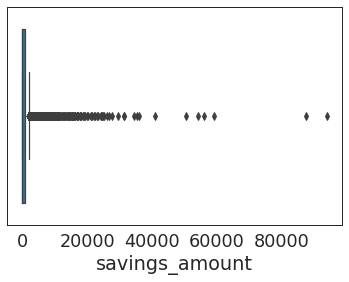

In [ ]:
array = df["savings_amount"].to_numpy()
#print(array)
print("Distribution of the savings_amount feature using Box plot")
sns.boxplot(df['savings_amount'])

We can see that the data contains outliers from the box plot.


Since, there is no missing data we will compute statistics directly.


In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["savings_amount"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  0.031076096081638815


We will use standard z scaling with savings amount feature

In [ ]:
des = df.describe()["savings_amount"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "savings_amount"] = (df.loc[i, "savings_amount"] - m)/std
print(df["savings_amount"])

0        -0.516074
1        -0.516074
2         0.778558
3        -0.516074
4        -0.420104
            ...   
199995   -0.516074
199996    0.031914
199997   -0.516074
199998    0.330380
199999   -0.516074
Name: savings_amount, Length: 200000, dtype: float64


The mean =  -5.0413007102179106e-17
The standard deviation =  1.0
The minimum value = -0.5160735364590532
The maximum value = 89.60718613704721
The median =  -0.5160735364590532
The first quartile =  -0.5160735364590532
The third quartile =  0.24112768050219027
Distribution of the savings_amount feature using histogram


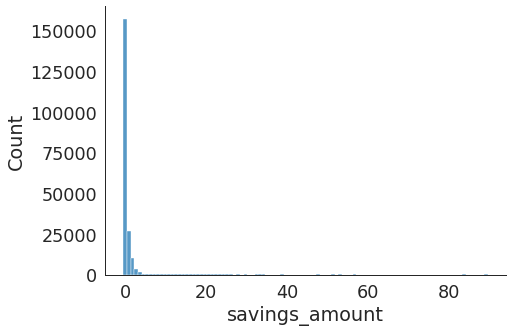

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="savings_amount", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["savings_amount"]

print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the savings_amount feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:32<00:00,  6.55s/it]


sumsquare_error            aic           bic  kl_div  ks_statistic  \
norm            0.242066  266298.023985 -2.724899e+06     inf      0.302901   
burr            0.470652    1272.949723 -2.591893e+06     inf      0.511625   
beta            0.502249   34461.557041 -2.578898e+06     inf      0.511415   
gamma           0.713702    7222.639053 -2.508636e+06     inf      0.411226   
lognorm         0.721027    1542.248895 -2.506594e+06     inf      0.480227   

         ks_pvalue  
norm           0.0  
burr           0.0  
beta           0.0  
gamma          0.0  
lognorm        0.0

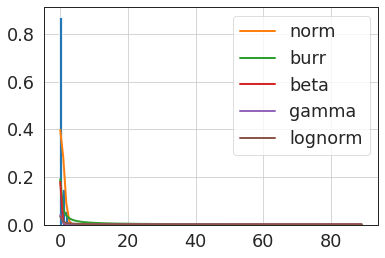

In [ ]:
BL = df["savings_amount"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

From the above figure, we can see that the normal and beta distributions fit the data the most

**Listed Date feature** 

We decieded to handle listed date as a categorical data because every date or year has its own inflation rate and different demands for prices. However, to reduce the dimensionality, we decided to include only the month and the year.

In [ ]:
df["listed_date"].value_counts()

9/3/2020     5079
9/4/2020     4711
9/2/2020     4652
9/5/2020     4569
8/29/2020    4078
             ... 
9/12/2017       1
6/14/2018       1
12/6/2017       1
12/2/2016       1
5/4/2017        1
Name: listed_date, Length: 1016, dtype: int64

In [ ]:
arr = []
for i in range(0, len(df)):
  temp = df.at[i, "listed_date"]
  count = 0
  for i in range(0, len(temp)):
    count += 1
    if(temp[i] == '/'):
      break
  arr.append(temp[count:])
print(arr)

['27/2020', '25/2020', '6/2020', '5/2020', '30/2020', '24/2020', '6/2019', '27/2020', '2/2020', '19/2020', '27/2020', '5/2020', '7/2020', '26/2020', '10/2020', '1/2020', '21/2020', '7/2020', '19/2020', '3/2020', '24/2020', '22/2020', '17/2020', '12/2020', '14/2020', '23/2020', '1/2020', '29/2020', '17/2020', '22/2020', '19/2020', '3/2020', '8/2020', '2/2020', '25/2020', '7/2020', '10/2020', '27/2020', '29/2020', '13/2020', '4/2020', '28/2020', '16/2020', '31/2020', '3/2020', '4/2020', '31/2020', '7/2020', '30/2020', '23/2020', '19/2020', '8/2019', '16/2020', '22/2020', '9/2020', '19/2020', '2/2020', '25/2020', '21/2020', '11/2020', '7/2020', '22/2020', '3/2020', '5/2020', '4/2020', '13/2020', '4/2020', '29/2020', '31/2020', '14/2020', '19/2020', '17/2020', '25/2020', '22/2020', '29/2020', '4/2020', '8/2020', '31/2019', '11/2020', '3/2019', '25/2020', '2/2020', '6/2020', '19/2020', '3/2020', '1/2020', '13/2020', '11/2020', '9/2020', '31/2020', '30/2020', '21/2020', '25/2020', '6/2020', 

In [ ]:
df["listed_date"] = arr
df["listed_date"]

0         27/2020
1         25/2020
2          6/2020
3          5/2020
4         30/2020
           ...   
199995     3/2020
199996    31/2020
199997     1/2020
199998     2/2020
199999    31/2020
Name: listed_date, Length: 200000, dtype: object

In [ ]:
print("Number of unique values = " , len(df["listed_date"].unique()))
print("Number of cars for different listing dates: ")
df["listed_date"].value_counts()

Number of unique values =  162
Number of cars for different listing dates: 


2/2020     8894
5/2020     8061
4/2020     7897
3/2020     7735
29/2020    7505
           ... 
18/2015       1
21/2016       1
21/2014       1
26/2016       1
20/2017       1
Name: listed_date, Length: 162, dtype: int64

In [ ]:
print("Number of missing values = ", df["listed_date"].isna().sum())

Number of missing values =  0


**Converting Listing Dates from categorical to numerical data using one hot encoding.**

In [ ]:
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"listed_date"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)

In [ ]:
for val in lis:
  df[val] = new_cols[val]

In [ ]:
df.drop("listed_date",axis = 1, inplace = True)

**Longitude and latitude Features**


Since longitude and latitude are meaningless on their own, we will use them to computer the distance from the selling location of the car to the center of tyhe city they belog to. We will get the longitude and latitude of the city using Google API

In [ ]:
import requests
import urllib.parse
cities = df["city"].unique()
Errors = []
longs = {} 
lats = {}
i = 0
for city in cities:
  print(i)
  i+= 1
  try:
    address = 'US, ' + city
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    lats[city] = response[0]["lat"]
    longs[city] = response[0]["lon"]
  except IndexError:
        Errors.append(city)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
lats["Lima"] = 40.7426
longs["Lima"] = -84.1052
lats["Peru"] = 41.3275
longs["Peru"] = -89.1290
lats["Merrit Island"] = 28.3181
longs["Merrit Island"] = -80.6660
lats["Angola"] = 41.6348
longs["Angola"] = -84.9994
lats["Sharpburg"] = 38.2020
longs["Sharpburg"] = -83.9294
lats["Mc Connellsburg"] = 39.9326
longs["Mc Connellsburg"] = -77.9989

In [ ]:
print(type(df["longitude"]))


<class 'pandas.core.series.Series'>


In [ ]:
distances = []
for i in range(0, len(df)):
  lo = float(longs[df.at[i, "city"]])
  la = float(lats[df.at[i, "city"]])
  dist = math.sqrt((lo-df.at[i, "longitude"])**2 + (la-df.at[i, "latitude"])**2)
  distances.append(dist)
 

In [ ]:
df["Distances"] = distances

In [ ]:
print("Number of missing values = ", df["Distances"].isna().sum())

Number of missing values =  0


We will draw a box plot to determine whether there are outliers or not.

Distribution of the back legroom feature using Box plot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distances'>

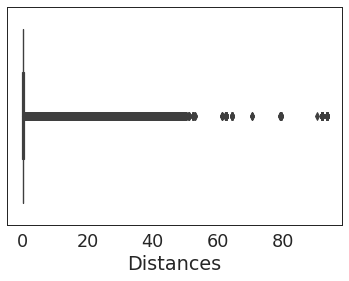

In [ ]:
array = df["Distances"].to_numpy()
#print(array)
print("Distribution of the back legroom feature using Box plot")
sns.boxplot(df['Distances'])

Since the data contains many outliers, we will use standard z scaling.

In [ ]:
import scipy.stats
r = scipy.stats.pearsonr(df["Distances"], df["price"]) 
print("Correlation Coeffecient = ", r[0])

Correlation Coeffecient =  -0.01420571947113601


In [ ]:
des = df.describe()["Distances"]
m = des["mean"]
std = des["std"]
for i in range(0, len(df)):
  df.loc[i, "Distances"] = (df.loc[i, "Distances"] - m)/std
print(df["Distances"])

0        -0.407143
1        -0.394291
2        -0.405053
3         2.217294
4        -0.405461
            ...   
199995   -0.391924
199996   -0.400344
199997   -0.294221
199998   -0.401738
199999   -0.406261
Name: Distances, Length: 200000, dtype: float64


The mean =  -4.128253294766182e-17
The standard deviation =  1.0
The minimum value = -0.4092575874233699
The maximum value = 12.092631917492659
The median =  -0.40092922316165225
The first quartile =  -0.40542109729795983
The third quartile =  -0.382344653718362
Distribution of the back Distances feature using histogram


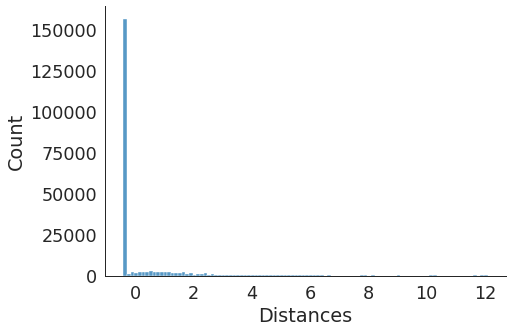

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Distances", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["Distances"]
print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the back Distances feature using histogram")

Fitting 5 distributions: 100%|██████████| 5/5 [00:23<00:00,  4.68s/it]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
beta           10.481663  5340.915582 -1.971240e+06     inf      0.308553   
lognorm        15.826285  1187.539830 -1.888843e+06     inf      0.203465   
burr           19.665442  1543.406969 -1.845393e+06     inf      0.353385   
gamma          20.775721  1076.438288 -1.834421e+06     inf      0.519866   
norm           35.236255  4902.688437 -1.728775e+06     inf      0.417527   

         ks_pvalue  
beta           0.0  
lognorm        0.0  
burr           0.0  
gamma          0.0  
norm           0.0

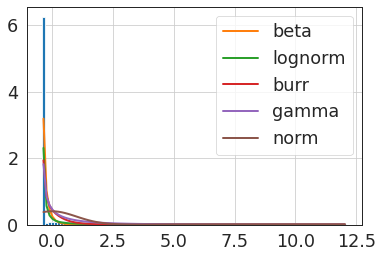

In [ ]:
BL = df["Distances"].values

BL = list(BL)
f = Fitter(BL,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], timeout = 240 )
f.fit()
f.summary()

**Vin or Vehicle ID feature:**

In [ ]:
print("Number of Unique values = ", len(df["vin"].unique()))

Number of Unique values =  199998


Since unique values of the vin nearly equals the number of data points we have, we decided to remove it becuase it has no effect on the price and if we did one hot encoding, it will increase the dimensionality

In [ ]:
df.drop("vin", axis = 1, inplace = True)

**Listing ID Feature**

In [ ]:
print("Number of Unique values = ", len(df["listing_id"].unique()))

Number of Unique values =  200000


From the Description of the dataset, the listing id was a unique feature for all cars. So, it has no effect on the price. As a result, we decided to remove it.

In [ ]:
df.drop("listing_id", axis = 1, inplace = True)

**The Is new Feature**

In [ ]:
print("Number of missing values = ", df["is_new"].isna().sum())

Number of missing values =  0


In [ ]:
print("Number of unique values = " , len(df["is_new"].unique()))
print("Number of cars for different is new features: ")
df["is_new"].value_counts()

Number of unique values =  2
Number of cars for different is new features: 


False    106063
True      93937
Name: is_new, dtype: int64

Since, this feature is a boolean feature and it has no missing values, we decided to keep it as it is and no preprocessing is required

**Dealer Zip Feature**

In [ ]:
len(df["dealer_zip"].unique())

13387

Since the zip code of the dealer contains a lot of values and as we also have some measurement that is related to the dealer, we decided to remove this feature.

In [ ]:
df.drop("dealer_zip", axis = 1, inplace = True)

**The frame damaged Feature**

In [ ]:
print("Number of unique values = " , len(df["frame_damaged"].unique()))
print("Number of cars for different fleet: ")
df["fleet"].value_counts()

Number of unique values =  3
Number of cars for different fleet: 


False    83535
True     24797
Name: fleet, dtype: int64

In [ ]:
print("Number of missing values = ", df["frame_damaged"].isna().sum())

Number of missing values =  91668


**Converting frame damaged feature from categorical to numerical data using one hot encoding.** 

In [ ]:
lis = df["frame_damaged"].unique()
print(lis)
lis2=[]
for val in lis:
  lis2.append(  "frame_damaged "+str(val))
print(lis2)
new_cols = {}
for val in lis2:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"frame_damaged"]
  
  if(target_col == True):
      new_cols['frame_damaged True'].append(1)
      new_cols['frame_damaged False'].append(0)
      new_cols['frame_damaged nan'].append(0)
  elif (target_col == False):
      new_cols['frame_damaged True'].append(0)
      new_cols['frame_damaged False'].append(1)
      new_cols['frame_damaged nan'].append(0)
  else:
      new_cols['frame_damaged True'].append(0)
      new_cols['frame_damaged False'].append(0)
      new_cols['frame_damaged nan'].append(1)

[nan False True]
['frame_damaged nan', 'frame_damaged False', 'frame_damaged True']


In [ ]:
for val in lis2:
  df[val] = new_cols[val]


**IS Cab Feature**

In [ ]:
print("Number of unique values = " , len(df["isCab"].unique()))
print("Number of cars for different is_cab: ")
df["isCab"].value_counts()

In [ ]:
print("Number of missing values = ", df["isCab"].isna().sum())

**Converting isCab feature from categorical to numerical data using one hot encoding.** ِ

In [ ]:
lis = df["isCab"].unique()
print(lis)
lis2=[]
for val in lis:
  lis2.append(  "isCab "+str(val))
print(lis2)
new_cols = {}
for val in lis2:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"isCab"]
  
  if(target_col == True):
      new_cols['isCab True'].append(1)
      new_cols['isCab False'].append(0)
      new_cols['isCab nan'].append(0)
  elif (target_col == False):
      new_cols['isCab True'].append(0)
      new_cols['isCab False'].append(1)
      new_cols['isCab nan'].append(0)
  else:
      new_cols['isCab True'].append(0)
      new_cols['isCab False'].append(0)
      new_cols['isCab nan'].append(1)

In [ ]:
for val in lis2:
  df[val] = new_cols[val]

**Has Accidents Feature**

In [ ]:
print("Number of unique values = " , len(df["has_accidents"].unique()))
print("Number of cars for different has_accidents: ")
df["has_accidents"].value_counts()

In [ ]:
print("Number of missing values = ", df["has_accidents"].isna().sum())

Number of missing values =  91668


**Converting has_accidents feature from categorical to numerical data using one hot encoding.** ِ

In [ ]:
lis = df["has_accidents"].unique()
print(lis)
lis2=[]
for val in lis:
  lis2.append(  "has_accidents "+str(val))
print(lis2)
new_cols = {}
for val in lis2:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"has_accidents"]
  
  if(target_col == True):
      new_cols['has_accidents True'].append(1)
      new_cols['has_accidents False'].append(0)
      new_cols['has_accidents nan'].append(0)
  elif (target_col == False):
      new_cols['has_accidents True'].append(0)
      new_cols['has_accidents False'].append(1)
      new_cols['has_accidents nan'].append(0)
  else:
      new_cols['has_accidents True'].append(0)
      new_cols['has_accidents False'].append(0)
      new_cols['has_accidents nan'].append(1)

[nan True False]
['has_accidents nan', 'has_accidents True', 'has_accidents False']


In [ ]:
for val in lis2:
  df[val] = new_cols[val]

**Fuel Type Feature**

In [ ]:
print("Number of unique values = " , len(df["fuel_type"].unique()))
print("Number of cars for different body types: ")
df["fuel_type"].value_counts()

Number of unique values =  7
Number of cars for different body types: 


Gasoline                  182850
Hybrid                      6112
Flex Fuel Vehicle           5177
Electric                    1336
Diesel                       818
Compressed Natural Gas         4
Name: fuel_type, dtype: int64

In [ ]:
print("Number of missing values = ", df["fuel_type"].isna().sum())

Number of missing values =  3703


**Converting Fuel types from categorical to numerical data using one hot encoding.**

In [ ]:
lis= df["fuel_type"].unique()
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"fuel_type"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)

In [ ]:
for val in lis:
  df[val] = new_cols[val]

**Owner Count Feature**

In [ ]:
print("Number of missing values = ", df["owner_count"].isna().sum())

Number of missing values =  96737


The mean =  1.5306547359654474
The standard deviation =  0.9111137897919851
The minimum value = 1.0
The maximum value = 13.0
The median =  1.0
The first quartile =  1.0
The third quartile =  2.0
Distribution of the owner_count feature using histogram


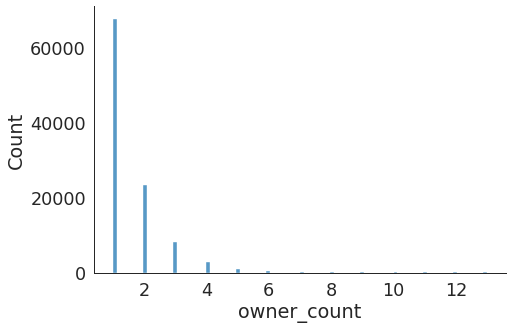

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="owner_count", kind="hist", bins = 100, aspect = 1.5)
outlirs = df.describe()["owner_count"]

print("The mean = ",outlirs["mean"])
print("The standard deviation = ", outlirs["std"])
print("The minimum value =", outlirs["min"])
print("The maximum value =", outlirs["max"])
print("The median = ", outlirs["50%"])
print("The first quartile = ", outlirs["25%"])
print("The third quartile = ", outlirs["75%"])
print("Distribution of the owner_count feature using histogram")

We will assign the missing values to the mod of the data

In [ ]:
import math
mod = df["owner_count"].mode()[0]
for i in range(0, len(df)):

  if(math.isnan(df.at[i, "owner_count"])):

    df.loc[i,"owner_count"] = mod

In [ ]:
lis = df["owner_count"].unique()
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"owner_count"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)


In [ ]:
for val in lis:
  df[str(val)+ " owners"] = new_cols[val]

In [ ]:
df.keys()

**Salvage Feature:**

In [ ]:
print("Number of unique values = " , len(df["salvage"].unique()))
print("Number of cars for different salvage: ")
df["salvage"].value_counts()

In [ ]:
print("Number of missing values = ", df["salvage"].isna().sum())

**Converting salvage feature from categorical to numerical data using one hot encoding.** ِ

In [ ]:
lis = df["salvage"].unique()
print(lis)
lis2=[]
for val in lis:
  lis2.append(  "salvage "+str(val))
print(lis2)
new_cols = {}
for val in lis2:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"salvage"]
  
  if(target_col == True):
      new_cols['salvage True'].append(1)
      new_cols['salvage False'].append(0)
      new_cols['salvage nan'].append(0)
  elif (target_col == False):
      new_cols['salvage True'].append(0)
      new_cols['salvage False'].append(1)
      new_cols['salvage nan'].append(0)
  else:
      new_cols['salvage True'].append(0)
      new_cols['salvage False'].append(0)
      new_cols['salvage nan'].append(1)

In [ ]:
for val in lis2:
  df[val] = new_cols[val]

**theft_title Feature**

In [ ]:
print("Number of unique values = " , len(df["theft_title"].unique()))
print("Number of cars for different theft_title: ")
df["theft_title"].value_counts()

In [ ]:
print("Number of missing values = ", df["theft_title"].isna().sum())

In [ ]:
lis = df["theft_title"].unique()
print(lis)
lis2=[]
for val in lis:
  lis2.append(  "theft_title "+str(val))
print(lis2)
new_cols = {}
for val in lis2:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"theft_title"]
  
  if(target_col == True):
      new_cols['theft_title True'].append(1)
      new_cols['theft_title False'].append(0)
      new_cols['theft_title nan'].append(0)
  elif (target_col == False):
      new_cols['theft_title True'].append(0)
      new_cols['theft_title False'].append(1)
      new_cols['theft_title nan'].append(0)
  else:
      new_cols['theft_title True'].append(0)
      new_cols['theft_title False'].append(0)
      new_cols['theft_title nan'].append(1)

In [ ]:
for val in lis2:
  df[val] = new_cols[val]

**TrimID Feature**

In [ ]:
print("Number of unique values = " , len(df["trimId"].unique()))
print("Number of missing values = ", df["trimId"].isna().sum())
ex = list(df["trimId"].value_counts().keys())
print(ex)
lis = []
for i in range(0, 100):
  lis.append(ex[i])

Since the TrimID feature has a lot of unique values, we decided to choose the 100 with the heights frequencies to include them and the rest will be under others category

In [ ]:
new_cols = {}
for trim in lis :
  new_cols[trim] = []
new_cols["others"]= []
print(new_cols)
for i in range(0, len(df)):
  target_col =df.at[i,"trimId"]
  if(target_col in lis):
    new_cols["others"].append(0)
    for trim in lis:
      if trim == target_col:
        new_cols[trim].append(1)
      else:
        new_cols[trim].append(0)
  else:
    new_cols["others"].append(1)
    for trim in lis:
        new_cols[trim].append(0)

In [ ]:
for i in range(0,100) :
  df[lis[i]] = new_cols[lis[i]]
df["others"] = new_cols["others"]

trim_name feature

In [ ]:
print("Number of unique values = " , len(df["trim_name"].unique()))
print("Number of missing values = ", df["trim_name"].isna().sum())
ex = list(df["trim_name"].value_counts().keys())
print(ex)
lis = []
for i in range(0, 100):
  lis.append(ex[i])

In [ ]:
new_cols = {}
for trim in lis :
  new_cols[trim] = []
new_cols["others"]= []
print(new_cols)
for i in range(0, len(df)):
  target_col =df.at[i,"trim_name"]
  if(target_col in lis):
    new_cols["others"].append(0)
    for trim in lis:
      if trim == target_col:
        new_cols[trim].append(1)
      else:
        new_cols[trim].append(0)
  else:
    new_cols["others"].append(1)
    for trim in lis:
        new_cols[trim].append(0)

In [ ]:
for i in range(0,100) :
  df[lis[i]] = new_cols[lis[i]]
df["others"] = new_cols["others"]

SP ID Feature

In [ ]:
print("Number of unique values = " , len(df["sp_id"].unique()))
print("Number of missing values = ", df["sp_id"].isna().sum())
ex = list(df["sp_id"].value_counts().keys())
print(ex)
lis = []
for i in range(0, 100):
  lis.append(ex[i])

In [ ]:
new_cols = {}
for trim in lis :
  new_cols[trim] = []
new_cols["others"]= []
print(new_cols)
for i in range(0, len(df)):
  target_col =df.at[i,"sp_id"]
  if(target_col in lis):
    new_cols["others"].append(0)
    for trim in lis:
      if trim == target_col:
        new_cols[trim].append(1)
      else:
        new_cols[trim].append(0)
  else:
    new_cols["others"].append(1)
    for trim in lis:
        new_cols[trim].append(0)

In [ ]:
for i in range(0,100) :
  df[lis[i]] = new_cols[lis[i]]
df["others"] = new_cols["others"]

SP Name Feature

In [ ]:
print("Number of unique values = " , len(df["sp_name"].unique()))
print("Number of missing values = ", df["sp_name"].isna().sum())
ex = list(df["sp_name"].value_counts().keys())
print(ex)
lis = []
for i in range(0, 100):
  lis.append(ex[i])

In [ ]:
new_cols = {}
for trim in lis :
  new_cols[trim] = []
new_cols["others"]= []
print(new_cols)
for i in range(0, len(df)):
  target_col =df.at[i,"sp_name"]
  if(target_col in lis):
    new_cols["others"].append(0)
    for trim in lis:
      if trim == target_col:
        new_cols[trim].append(1)
      else:
        new_cols[trim].append(0)
  else:
    new_cols["others"].append(1)
    for trim in lis:
        new_cols[trim].append(0)

In [ ]:
for i in range(0,100) :
  df[lis[i]] = new_cols[lis[i]]
df["others"] = new_cols["others"]

**Interior Color Feature**

In [ ]:
print("Number of unique values = " , len(df["interior_color"].unique()))
print("Number of missing values = ", df["interior_color"].isna().sum())

Since this feature contains a lot of unique vlaues, we decided to stem this feature to its original values. For example, "Fancy red" will be red

In [ ]:
pip install colour

In [ ]:
from colour import Color
def check_color(color):
    try:
        Color(color)
        return True
    except ValueError:
        return False

In [ ]:
for i in range(0, len(df)):

  x = type("dsfjn")
  if(type(df.at[i, "interior_color"]) == x):
    s = df.at[i, "interior_color"]
    #print(s)
    if(s == "#VALUE!" or s == "#37)"):
      df.loc[i, "interior_color"] = None
    else:
      try:
        _color = [i for i in s.split(' ') if check_color(i)]
        h = len(_color)
      
        if(h > 0):
            df.loc[i, "interior_color"] = _color[0].lower()
        else:
            df.loc[i, "interior_color"] = None

      except AttributeError:
        df.loc[i, "interior_color"] = None
    

In [ ]:
print(df["interior_color"].unique())

**Converting interior colors from categorical to numerical data using one hot encoding.**

In [ ]:
lis = df["interior_color"].unique()
new_cols = {}
for val in lis:
  new_cols[val] = []
for i in range(0, len(df)):
  target_col =df.at[i,"interior_color"]
  for val in lis:
    if(target_col == val):
      new_cols[val].append(1)
    else:
      new_cols[val].append(0)

In [ ]:
for val in lis:
  df[val] = new_cols[val]

**The feature: "EXtra features"**

Since each car has an array of extra features, we will put extra feature in a column and then whenever a car has a specific feature it will be marked as 1 in this feature

In [ ]:
features = {}
for i in range(0, len(df) ):
  x = type("lkm")
 # print(df.at[i, "major_options"])
  if(type(df.at[i, "major_options"]) == x):
   # print(df.at[i, "major_options"])
    l = len(df.at[i, "major_options"])
    temp = df.at[i, "major_options"][1: len(df.at[i, "major_options"])-1]
    tmp = temp.split(", ")
    for item in tmp:
      features[item] = 1
print(len(features))

In [ ]:
new_cols = {}
for feature in features:
  new_cols[feature] = []
for feature in features:
  #print(feature)
  for i in range(0, len(df)):
    if(type(df.at[i, "major_options"]) == type("vghbj")):
      temp = df.at[i, "major_options"][1: len(df.at[i, "major_options"])]
      tmp = temp.split(", ")
      if(feature in temp):
        new_cols[feature].append(1)
      else:
        new_cols[feature].append(0)
    else:
      new_cols[feature].append(0)

In [ ]:
for feature in features:
  df[feature] = new_cols[feature]

In [ ]:
df.keys()

In [ ]:
df1_random_sample_of_one_thousand_obs = df.sample(n = 100)

In [ ]:
df1_random_sample_of_one_thousand_obs.to_csv("sample_of_one_thousand_observation.csv")